In [1]:
import os

from google.colab import drive
drive.mount('drive')

!mkdir -p drive -v
#!google-drive-ocamlfuse drive

cwd = os.getcwd()

#### Changez le chemin ci-dessous vers votre repertoire dans votre googledrive
##############################################################################

monchemin = 'drive/My Drive/Colab Notebooks/M2I3A/PSTALN/projet'

dir_path  = os.path.join(cwd, monchemin)
dirs = os.listdir(dir_path)
os.chdir(dir_path)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Recupération des données bibliovid

In [2]:
import json

In [3]:
with open('bibliovid.json') as json_data:
    data_dict = json.load(json_data)

In [4]:
print("Nombres d'article:",len(data_dict))
print("Avec ces informations pour chacun:")
for i in data_dict:
    for cle, val in i.items():
        print(cle)
    break

Nombres d'article: 682
Avec ces informations pour chacun:
id
slug
title
has_other_authors
impact_factor
goals_plain
verbose_date
authors
document_link
specialties
category
journal
link
results
synthesis
strength_of_evidence_details
goals
methods
pubmed_id
doi
abstract
topics
author_list
publication_date


In [5]:
print('Un exemple d\'articles:')
print(data_dict[1])

Un exemple d'articles:
{'id': 756, 'slug': 'optimal-covid-19-epidemic-control-until-vaccine-deployment', 'title': 'Optimal COVID-19 epidemic control until vaccine deployment', 'has_other_authors': True, 'impact_factor': {'id': 4, 'name': 'Indéterminé', 'posts_count': 96, 'color': 'gray', 'order': 4}, 'goals_plain': 'L\'objectif de cette étude est de déterminer des stratégies permettant le contrôle d\'une épidémie limitant au maximum le nombre de morts dûs à cette épidémie, ainsi que le coût associé à cette politique de contrôle. En particulier, l\'article prend en compte l\'augmentation de la mortalité associée à une saturation du système de santé. Différentes stratégies "réalistes" sont également considérées, comme une politique de contrôle mise à jour à intervalles réguliers, une politique de contrôle constante, ou une alternance entre période de contrôle maximal (type confinement) et minimal.', 'verbose_date': '22.07.2020', 'authors': 'Djidjou-Demasse R', 'document_link': 'https://w

In [6]:
print('Comment sont représentés les spécialités')
print(data_dict[28]['specialties'])

Comment sont représentés les spécialités
[{'id': 21, 'name': 'Confinement/Déconfinement'}]


In [7]:
print('Un exemple d\'abstract')
print(data_dict[0]['abstract'])

Un exemple d'abstract
Obesity is a risk factor for pneumonia and acute respiratory distress syndrome.
To determine whether obesity is associated with intubation or death, inflammation, cardiac injury, or fibrinolysis in coronavirus disease 2019 (COVID-19).
Retrospective cohort study.
A quaternary academic medical center and community hospital in New York City.
2466 adults hospitalized with laboratory-confirmed severe acute respiratory syndrome coronavirus 2 infection over a 45-day period with at least 47 days of in-hospital observation.
Body mass index (BMI), admission biomarkers of inflammation (C-reactive protein [CRP] level and erythrocyte sedimentation rate [ESR]), cardiac injury (troponin level), and fibrinolysis (D-dimer level). The primary end point was a composite of intubation or death in time-to-event analysis.
Over a median hospital length of stay of 7 days (interquartile range, 3 to 14 days), 533 patients (22%) were intubated, 627 (25%) died, and 59 (2%) remained hospitaliz

In [8]:
specialties = {} # dictionnaire id -> specialité
nb_per_spe = {}  # nombres d'articles par spécialité

In [9]:
ind_spe = 0
for article in data_dict:
    for spe in article['specialties']:
        if spe['name'] not in specialties.keys():
            specialties[spe['name']] = ind_spe
            nb_per_spe[spe['name']] = 0
            ind_spe += 1
        nb_per_spe[spe['name']] += 1

In [10]:
print(nb_per_spe)

{'Anesthésie-Réanimation': 93, 'Infectiologie': 213, 'Transversale': 287, 'Immunité': 19, 'Virologie': 71, 'Confinement/Déconfinement': 19, 'Pédiatrie': 41, 'Pneumologie': 57, 'Gynécologie Obstétrique': 22, 'Gériatrie': 5, 'Cardiologie et maladies métaboliques': 62, 'Hygiène': 41, 'Hépato-gastro-entérologie': 13, 'Neurologie': 19, 'Radiologie': 32, 'Dermatologie': 4, 'Hématologie': 7, 'Psychiatrie': 20, 'Néphrologie': 5}


In [11]:
LABELS = list(specialties.keys())
LABELS

['Anesthésie-Réanimation',
 'Infectiologie',
 'Transversale',
 'Immunité',
 'Virologie',
 'Confinement/Déconfinement',
 'Pédiatrie',
 'Pneumologie',
 'Gynécologie Obstétrique',
 'Gériatrie',
 'Cardiologie et maladies métaboliques',
 'Hygiène',
 'Hépato-gastro-entérologie',
 'Neurologie',
 'Radiologie',
 'Dermatologie',
 'Hématologie',
 'Psychiatrie',
 'Néphrologie']

In [ ]:
print('Un exemple d\'articles:')
print(data_dict[1])

Un exemple d'articles:
{'id': 756, 'slug': 'optimal-covid-19-epidemic-control-until-vaccine-deployment', 'title': 'Optimal COVID-19 epidemic control until vaccine deployment', 'has_other_authors': True, 'impact_factor': {'id': 4, 'name': 'Indéterminé', 'posts_count': 96, 'color': 'gray', 'order': 4}, 'goals_plain': 'L\'objectif de cette étude est de déterminer des stratégies permettant le contrôle d\'une épidémie limitant au maximum le nombre de morts dûs à cette épidémie, ainsi que le coût associé à cette politique de contrôle. En particulier, l\'article prend en compte l\'augmentation de la mortalité associée à une saturation du système de santé. Différentes stratégies "réalistes" sont également considérées, comme une politique de contrôle mise à jour à intervalles réguliers, une politique de contrôle constante, ou une alternance entre période de contrôle maximal (type confinement) et minimal.', 'verbose_date': '22.07.2020', 'authors': 'Djidjou-Demasse R', 'document_link': 'https://w

In [ ]:
print('Comment sont représentés les spécialités')
print(data_dict[28]['specialties'])

Comment sont représentés les spécialités
[{'id': 21, 'name': 'Confinement/Déconfinement'}]


In [ ]:
print('Un exemple d\'abstract')
print(data_dict[0]['abstract'])

Un exemple d'abstract
Obesity is a risk factor for pneumonia and acute respiratory distress syndrome.
To determine whether obesity is associated with intubation or death, inflammation, cardiac injury, or fibrinolysis in coronavirus disease 2019 (COVID-19).
Retrospective cohort study.
A quaternary academic medical center and community hospital in New York City.
2466 adults hospitalized with laboratory-confirmed severe acute respiratory syndrome coronavirus 2 infection over a 45-day period with at least 47 days of in-hospital observation.
Body mass index (BMI), admission biomarkers of inflammation (C-reactive protein [CRP] level and erythrocyte sedimentation rate [ESR]), cardiac injury (troponin level), and fibrinolysis (D-dimer level). The primary end point was a composite of intubation or death in time-to-event analysis.
Over a median hospital length of stay of 7 days (interquartile range, 3 to 14 days), 533 patients (22%) were intubated, 627 (25%) died, and 59 (2%) remained hospitaliz

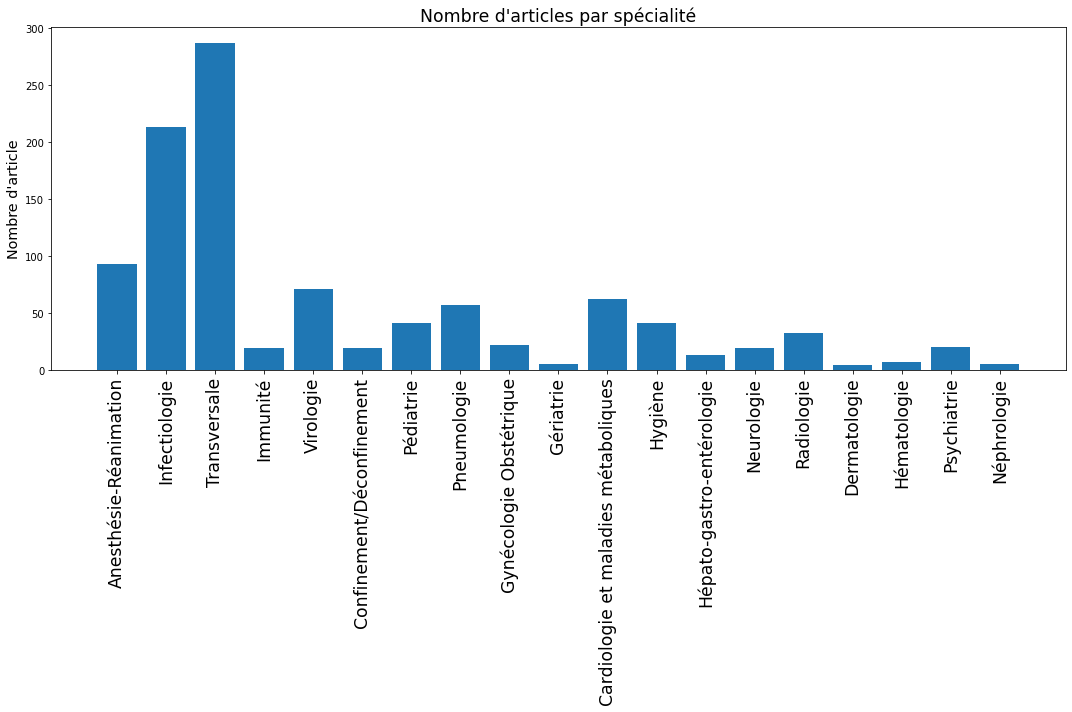

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,10))
plt.bar(np.arange(19), nb_per_spe.values())
plt.title('Nombre d\'articles par spécialité',size='xx-large')
plt.ylabel('Nombre d\'article',size='x-large')
plt.xticks(np.arange(19), nb_per_spe.keys(), rotation='vertical',size='xx-large')
plt.tight_layout()
fig.savefig('nbre_par_spe.png')
plt.show()

On remarque que certaines spécialités sont très peu représentés (Dermatologie, Gériatrie, Néphrologie), ce qui risque de poser problèmes pour des modèles entrainés depuis 0.

Au contraire, nous avons beaucoup d'exemples pour la spécialité "Transversale", et ce n'est sûrement pas très pertinent car cette spécialité va finalement en englober plusieurs et cela risque de "brouiller" nos classifieurs. On pourrait par exemple mettre la spécialité Transversale si on a déjà prédit 2 spécialité pour l'article.

# Préparation des données

On va récupérer les données qui nous intéresse.

In [19]:
import utils
texts, Y = utils.get_data(data_dict, get_abstract = False)

On soupçonne la spécialité nommée "transversale" d'induire en erreur nos classifieurs, nous créons donc un Y_modif et un LABELS_modif dans lesquels cette catégories a été supprimée.

In [20]:
import numpy as np
Y_modif = np.delete(Y, 2, axis=1)
LABELS_modif = np.delete(LABELS, 2)

In [33]:
print(len(LABELS))
print(len(LABELS_modif))
print("y shape:",Y.shape)
print("y sans transversale shape:",Y_modif.shape)

19
18
y shape: (682, 19)
y sans transversale shape: (682, 18)


Sur les 682 articles que l'on a, on en a 207 qui n'ont pas d'abstract. On va tenter dans un premier temps de prédire la classe seulement avec le titre afin que toutes les données fassent à peu près la même longueur.

Nous allons utiliser les représentations CountVectorizer et TfidVectorizer.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer(stop_words="english", max_features=2000, min_df=1)  #max_df
vect.fit(texts)
vect2 = TfidfVectorizer(stop_words="english", max_features=2000, min_df=1)  #max_df
vect2.fit(texts)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [35]:
print("TfidVectorizer")
print("Vocabulary size: {}".format(len(vect2.vocabulary_)))
print("Vocabulary content:\n {}".format(vect2.vocabulary_))

TfidVectorizer
Vocabulary size: 1792
Vocabulary content:
 {'body': 220, 'mass': 978, 'index': 809, 'risk': 1411, 'intubation': 868, 'death': 420, 'sars': 1429, 'cov': 391, 'infection': 821, 'retrospective': 1399, 'cohort': 307, 'study': 1566, 'optimal': 1120, 'covid': 393, '19': 21, 'epidemic': 559, 'control': 359, 'vaccine': 1725, 'deployment': 439, 'contact': 348, 'rate': 1319, 'equilibrium': 565, 'view': 1750, 'hydroxychloroquine': 744, 'treatment': 1673, 'prophylaxis': 1278, 'non': 1092, 'human': 739, 'primates': 1254, 'infectivity': 824, 'profile': 1266, 'correction': 378, 'mrna': 1039, 'preliminary': 1241, 'report': 1376, 'pathophysiology': 1155, 'transmission': 1665, 'diagnosis': 463, 'coronavirus': 376, 'disease': 483, '2019': 25, 'review': 1404, 'introductions': 866, 'early': 520, 'spread': 1529, 'france': 671, '24': 32, 'january': 888, '23': 31, 'march': 972, '2020': 27, 'opensafely': 1118, 'factors': 623, 'associated': 178, '17': 20, 'million': 1014, 'patients': 1157, 'model

In [36]:
bag_of_words = vect.transform(texts)
bag_of_words2 = vect2.transform(texts)


## Séparation test / train

In [37]:
from sklearn.model_selection import train_test_split
## avec 'Transversale'
X_train, X_test, y_train, y_test = train_test_split(bag_of_words2, Y, test_size=0.2, random_state=42)#, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
## sans 'Transversale'
X_train, X_test, y_train_modif, y_test_modif = train_test_split(bag_of_words2, Y_modif, test_size=0.2, random_state=42)#, stratify=y)
X_train, X_valid, y_train_modif, y_valid_modif = train_test_split(X_train, y_train_modif, test_size=0.1, random_state=42)

In [38]:
print(X_train.shape, y_train.shape, y_train_modif.shape)
print(X_valid.shape, y_valid.shape, y_valid_modif.shape)
print(X_test.shape, y_test.shape, y_test_modif.shape)

(490, 1792) (490, 19) (490, 18)
(55, 1792) (55, 19) (55, 18)
(137, 1792) (137, 19) (137, 18)


# Multi-Label Classifiers

### Knn
On va d'abord tester avec les modèles sk-learn qui nous permettent de traiter les problèmes multi-label. Ci-dessous les modèles sont entrainés seulement avec les titres des articles avec une représentation TFid. Nous avons tester aussi avec les abstract et/ ou la représentation CountVectorizer mais c'était moins bon (voir résultats dans rapport).

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pandas as pd

In [60]:
def grid_fit(grid, x_tr, y_tr, x_te, y_te):
  grid.fit(x_tr,y_tr)

  print (grid.best_score_)
  print (grid.best_params_)
  print (grid.best_estimator_)

  best_knn = grid.best_estimator_
  y_pred = best_knn.predict(x_te)
  score = f1_score(y_te,y_pred , average='micro',zero_division=0)
  
  KNN = {'f1-micro':score, 'f1-macro':f1_score(y_te,y_pred , average='macro',zero_division=0),'f1-weighted': f1_score(y_te,y_pred , average='weighted',zero_division=0),'f1-samples':f1_score(y_te,y_pred , average='samples',zero_division=0)}
  print(KNN)
  
  return KNN

In [61]:
k_range = list(range(1,15))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 3, scoring = 'f1_micro')
print("Avec 'Transversale' : \n")
KNN = grid_fit(grid, X_train, y_train, X_test, y_test)
print("\n\nSans 'Transversale' : \n")
KNN_modif = grid_fit(grid, X_train, y_train_modif, X_test, y_test_modif)


Avec 'Transversale' : 

0.4151549668510819
{'n_neighbors': 3, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
{'f1-micro': 0.4722222222222222, 'f1-macro': 0.319765408131112, 'f1-weighted': 0.42994242917538916, 'f1-samples': 0.45328467153284674}


Sans 'Transversale' : 

0.37130820633422484
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
{'f1-micro': 0.40143369175627236, 'f1-macro': 0.3882632691112223, 'f1-weighted': 0.3863834632668482, 'f1-samples': 0.2763990267639902}


### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
def forest_fit(clf, x_tr, y_tr, x_te, y_te):
  forestClf.fit(x_tr,y_tr)
  y_pred = forestClf.predict(x_te)
  print(f1_score(y_te,y_pred , average='samples',zero_division=0))
  RandomForest= {'f1-micro':score, 'f1-macro':f1_score(y_te,y_pred , average='macro',zero_division=0),'f1-weighted': f1_score(y_te,y_pred , average='weighted',zero_division=0),'f1-samples':f1_score(y_te,y_pred , average='samples',zero_division=0)}
  print(RandomForest)

  return RandomForest

In [68]:
forestClf = RandomForestClassifier()

print("Avec 'Transversale' : \n")
RandomForest = forest_fit(forestClf, X_train, y_train, X_test, y_test)
print("\n\nSans 'Transversale' : \n")
RandomForest_modif = forest_fit(forestClf, X_train, y_train_modif, X_test, y_test_modif)

Avec 'Transversale' : 

0.4148418491484185
{'f1-micro': 0.40143369175627236, 'f1-macro': 0.22159494648571113, 'f1-weighted': 0.3179530848958639, 'f1-samples': 0.4148418491484185}


Sans 'Transversale' : 

0.1192214111922141
{'f1-micro': 0.40143369175627236, 'f1-macro': 0.19454732510288067, 'f1-weighted': 0.1916243040426047, 'f1-samples': 0.1192214111922141}


In [ ]:
scores_tfid = pd.DataFrame(index=['KNN', 'KNN modifié', 'Random Forest', 'Random Forest modifié'], columns=['f1-micro', 'f1-macro','f1-weighted','f1-samples'])
scores_tfid.loc['KNN'] = pd.Series(KNN)
scores_tfid.loc['Random Forest'] = pd.Series(RandomForest)
scores_tfid.loc['KNN modifié'] = pd.Series(KNN_modif)
scores_tfid.loc['Random Forest modifié'] = pd.Series(RandomForest_modif)
display(scores_tfid)

Finalement, la classe 'Transversale' est utile et permet d'obtenir de meilleure performance au vue du F1-score micro.

### Prédictions des classes une par une : stratégie one vs rest

On fait une régréssion logistique binaire pour tous les labels pour prédire si oui ou non on aura ce label pour ce texte. (inspiré de https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)

On suppose donc ici qu'il n'y a pas de corrélation entre les labels.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

In [ ]:
for label in range(len(LABELS)):
    print('**Label {} **'.format(LABELS[label]))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[:,label])
    print("Entrainé avec ",np.shape(np.where(y_train[:,label]==1))[1],"exemples avec ce label")
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(y_test[:,label], prediction)))
    print("Testé sur ",np.shape(np.where(y_test[:,label]==1))[1],"exemples")
    print("\n")

**Label Anesthésie-Réanimation **
Entrainé avec  77 exemples avec ce label
Accuracy: 0.8832116788321168
Testé sur  16 exemples


**Label Infectiologie **
Entrainé avec  172 exemples avec ce label
Accuracy: 0.7372262773722628
Testé sur  41 exemples


**Label Transversale **
Entrainé avec  227 exemples avec ce label
Accuracy: 0.6204379562043796
Testé sur  60 exemples


**Label Immunité **
Entrainé avec  18 exemples avec ce label
Accuracy: 0.9927007299270073
Testé sur  1 exemples


**Label Virologie **
Entrainé avec  63 exemples avec ce label
Accuracy: 0.9416058394160584
Testé sur  8 exemples


**Label Confinement/Déconfinement **
Entrainé avec  16 exemples avec ce label
Accuracy: 0.9781021897810219
Testé sur  3 exemples


**Label Pédiatrie **
Entrainé avec  31 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Pneumologie **
Entrainé avec  47 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Gynécologie Obstétrique **
Ent

In [ ]:
SVC_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

for label in range(len(LABELS)):
    print('**Label {} **'.format(LABELS[label]))
    
    # Training logistic regression model on train data
    SVC_pipeline.fit(X_train, y_train[:,label])
    print("Entrainé avec ",np.shape(np.where(y_train[:,label]==1))[1],"exemples avec ce label")
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(y_test[:,label], prediction)))
    print("Testé sur ",np.shape(np.where(y_test[:,label]==1))[1],"exemples")
    print("\n")

**Label Anesthésie-Réanimation **
Entrainé avec  77 exemples avec ce label
Accuracy: 0.8832116788321168
Testé sur  16 exemples


**Label Infectiologie **
Entrainé avec  172 exemples avec ce label
Accuracy: 0.7007299270072993
Testé sur  41 exemples


**Label Transversale **
Entrainé avec  227 exemples avec ce label
Accuracy: 0.5620437956204379
Testé sur  60 exemples


**Label Immunité **
Entrainé avec  18 exemples avec ce label
Accuracy: 0.9927007299270073
Testé sur  1 exemples


**Label Virologie **
Entrainé avec  63 exemples avec ce label
Accuracy: 0.9416058394160584
Testé sur  8 exemples


**Label Confinement/Déconfinement **
Entrainé avec  16 exemples avec ce label
Accuracy: 0.9781021897810219
Testé sur  3 exemples


**Label Pédiatrie **
Entrainé avec  31 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Pneumologie **
Entrainé avec  47 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Gynécologie Obstétrique **
Ent

In [ ]:
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

for label in range(len(LABELS)):
    print('**Label {} **'.format(LABELS[label]))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(X_train, y_train[:,label])
    print("Entrainé avec ",np.shape(np.where(y_train[:,label]==1))[1],"exemples avec ce label")
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(y_test[:,label], prediction)))
    print("Testé sur ",np.shape(np.where(y_test[:,label]==1))[1],"exemples")
    print("\n")

**Label Anesthésie-Réanimation **
Entrainé avec  77 exemples avec ce label
Accuracy: 0.8832116788321168
Testé sur  16 exemples


**Label Infectiologie **
Entrainé avec  172 exemples avec ce label
Accuracy: 0.7007299270072993
Testé sur  41 exemples


**Label Transversale **
Entrainé avec  227 exemples avec ce label
Accuracy: 0.5620437956204379
Testé sur  60 exemples


**Label Immunité **
Entrainé avec  18 exemples avec ce label
Accuracy: 0.9927007299270073
Testé sur  1 exemples


**Label Virologie **
Entrainé avec  63 exemples avec ce label
Accuracy: 0.9416058394160584
Testé sur  8 exemples


**Label Confinement/Déconfinement **
Entrainé avec  16 exemples avec ce label
Accuracy: 0.9781021897810219
Testé sur  3 exemples


**Label Pédiatrie **
Entrainé avec  31 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Pneumologie **
Entrainé avec  47 exemples avec ce label
Accuracy: 0.927007299270073
Testé sur  10 exemples


**Label Gynécologie Obstétrique **
Ent


Nous obtenons 19 classifieurs (1 pour chaque spécialité) expert sur sa spécialité, mais finalement ça ne parait pas pertinent car il y a des spécialités où il y a trop peu de données, le classifieur ne peut pas apprendre grand chose de cette manière. Nous n'irons donc pas plus loin pour cette approche.

## Conclusion

Les classifieurs "classiques" multilabels ne nous permettent pas d'avoir de bons résultats au vu du manque de certaines données. Nous allons maintenant tester et nous concentrer sur des méthodes deep, comme par exemple le modèle BioBert déjà pré-entrainé sur des données médicales qui permet (il parait), de bons résultats même avec très peu de données.

#  Construction des Data loaders

In [12]:
import numpy as np
import keras

titre_abstract, spe = [],[] 

for article in data_dict:
    t = article['title'] 
    if 'abstract' in article.keys():
        t += ' '
        t += str(article['abstract'])
    titre_abstract.append(t[:512])
    temp = []
    for s in article['specialties']:
      temp.append(s['name'])
    spe.append(temp)
  
print(len(titre_abstract))
print(len(spe))
print(spe[:5])

682
682
[['Anesthésie-Réanimation', 'Infectiologie'], ['Infectiologie'], ['Infectiologie'], ['Transversale', 'Infectiologie'], ['Infectiologie']]


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(spe)
classes = mlb.classes_
classes

train_texts, test_texts, y_train, y_test, train_labels, test_labels = train_test_split(titre_abstract, spe, y_bin, test_size=0.25, random_state=42)
train_texts, valid_texts, y_train, y_valid, train_labels, valid_labels = train_test_split(train_texts, y_train, train_labels, test_size=0.2, random_state=42)

In [14]:
!pip -q install transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')

def bert_text_to_ids(sentence):
  return torch.tensor(tokenizer.encode(sentence, add_special_tokens=True))


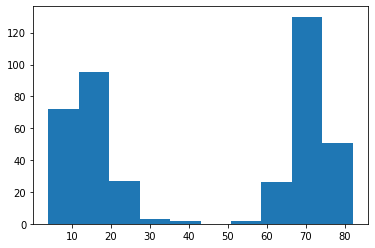

In [15]:
from matplotlib import pyplot as plt
plt.hist([len(text.split()) for text in train_texts])
plt.show()

In [16]:
import collections
import torch
label_vocab = collections.defaultdict(lambda: len(label_vocab))
MAXLEN = 80
batch_size = 32
hidden_size = 128
embed_size = 128
DEVICE = torch.device('cuda')

def prepare_texts(texts, labels):
  X = torch.LongTensor(len(texts), MAXLEN).fill_(tokenizer.pad_token_id)
  for i, text in enumerate(texts):
    indexed_tokens = bert_text_to_ids(text)
    length = min([MAXLEN, len(indexed_tokens)])
    X[i,:length] = indexed_tokens[:length]
  
  Y = torch.tensor(labels).long()
  return X.to(DEVICE), Y.to(DEVICE)

X_train, y_train = prepare_texts(train_texts, train_labels)
X_valid, y_valid = prepare_texts(valid_texts, valid_labels)
X_test, y_test = prepare_texts(test_texts, test_labels)

In [17]:
print(X_train.shape, X_test.shape, X_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)

torch.Size([408, 80]) torch.Size([171, 80]) torch.Size([103, 80])
torch.Size([408, 19]) torch.Size([171, 19]) torch.Size([103, 19])


In [18]:
from torch.utils.data import TensorDataset, DataLoader

train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

# RNN Classifier

## class RNN classifier 

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [34]:
class RNNClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.embed = nn.Embedding(tokenizer.vocab_size, embed_size, padding_idx=tokenizer.pad_token_id)
    self.rnn = nn.GRU(embed_size, hidden_size, num_layers=1, bidirectional=True, batch_first=True)
    self.dropout = nn.Dropout(0.3)
    self.decision = nn.Linear(1 * 2 * hidden_size, len(LABELS))
    self.to(DEVICE)
  
  def forward(self, x):
    embed = self.embed(x)
    output, hidden = self.rnn(embed) 
    drop = self.dropout(hidden.transpose(0, 1).reshape(x.shape[0], -1))
    return torch.softmax(self.decision(drop),1)

rnn_model = RNNClassifier()
with torch.no_grad():
  print(rnn_model(X_train[:3]).shape)

torch.Size([3, 19])


## Performance et entraînement RNN classifier 

Reprise du notebook sur litcovid pour les fonctions de performances et de fit en multi label

In [35]:
def CrossEntropyLossOneHot(y_score=None, y=None):
    """CrossEntropy pour la multi classification
    """
    log_y_score = torch.log(y_score)
    cost = -torch.sum(y * log_y_score)
    return cost

def perf(model, loader, seuil:float=2e-1):
    """Evaluation en multi-label, le seuil désigne le niveau a partir duquel on considère une classe comme 'prédite'
    """
    criterion = CrossEntropyLossOneHot
    model.eval()
    total_loss = num = num_comp = correct = 0
    total_pred = true_y = None # concaténation des batchs
    for x, y in loader:
        with torch.no_grad():
            y_scores = model(x)
            loss = criterion(y_scores, y)
            y_pred = multi_hot(y_scores, seuil)
            if total_pred == None: # concat
                total_pred = y_pred
                true_y = y
            else:
                total_pred = torch.cat((total_pred,y_pred), dim=0)
                true_y = torch.cat((true_y,y), dim=0)
            correct += torch.sum(y_pred == y).item()
            total_loss += loss.item()
            num_comp += len(y) * len(LABELS)
            num += len(y)

    f_score = f1_score(true_y.cpu(), total_pred.cpu(), average='micro')
    accu_score = accuracy_score(true_y.cpu(), total_pred.cpu())
    return total_loss / num, correct / num_comp, accu_score, f_score

In [36]:
def multi_hot(y_pred, seuil=2e-1):
    """binarize prediction using threshold
    """
    res = torch.zeros(y_pred.shape[0], y_pred.shape[1])#.int()
    res[torch.arange(y_pred.shape[0]), torch.argmax(y_pred, dim=1)] = 1
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y_pred[i,j] > seuil:
                res[i,j] = 1
    return res.to(DEVICE)

In [37]:
def fit_rnn(model, train_loader, epochs, lr=1e-3, seuil=2e-1): 
    criterion = CrossEntropyLossOneHot
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history  = {
        'train_losses' : [],
        'val_losses' : [],
        'preci' : [],
        'all_good_preci' : [],
        'f_micro' : [],
    }

    for epoch in range(epochs):
        model.train()
        total_loss = num = 0
        for x, y in tqdm(train_loader):
            optimizer.zero_grad()
            y_scores = model(x)
            loss = criterion(y_scores, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            num += len(y)

        valloss, preci, accu_score, f_mesure = perf(model, valid_loader, seuil)
        history['train_losses'].append(total_loss / num)
        history['val_losses'].append(valloss)
        history['preci'].append(preci)
        history['all_good_preci'].append(accu_score)
        history['f_micro'].append(f_mesure)

        print(f'\nepoch : {epoch}\t - train loss : {total_loss / num}\t - val loss : {valloss}\t - precision :{preci}\t - all good precision : {accu_score}\t - f-score micro : {f_mesure}')

    return history

In [25]:
history_rnnclassif = fit_rnn(rnn_model, train_loader, 10)

100%|██████████| 13/13 [00:00<00:00, 104.68it/s]


epoch : 0	 - train loss : 3.900784324197208	 - val loss : 3.7645106269317923	 - precision :0.9018906489524783	 - all good precision : 0.18446601941747573	 - f-score micro : 0.32394366197183094



100%|██████████| 13/13 [00:00<00:00, 103.34it/s]


epoch : 1	 - train loss : 3.3912180545283297	 - val loss : 3.775627080676625	 - precision :0.8906489524782831	 - all good precision : 0.10679611650485436	 - f-score micro : 0.36309523809523814



100%|██████████| 13/13 [00:00<00:00, 111.10it/s]


epoch : 2	 - train loss : 3.2533348120895087	 - val loss : 3.769691911715906	 - precision :0.9008686765457332	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3120567375886525



100%|██████████| 13/13 [00:00<00:00, 107.38it/s]


epoch : 3	 - train loss : 3.128794875799441	 - val loss : 3.7615780321139733	 - precision :0.8983137455288707	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3682539682539683



100%|██████████| 13/13 [00:00<00:00, 105.47it/s]


epoch : 4	 - train loss : 2.959761095981972	 - val loss : 3.731567179115073	 - precision :0.9059785385794583	 - all good precision : 0.17475728155339806	 - f-score micro : 0.36551724137931035



100%|██████████| 13/13 [00:00<00:00, 111.36it/s]


epoch : 5	 - train loss : 2.761401849634507	 - val loss : 3.7661019297479426	 - precision :0.9059785385794583	 - all good precision : 0.18446601941747573	 - f-score micro : 0.36551724137931035



100%|██████████| 13/13 [00:00<00:00, 113.47it/s]


epoch : 6	 - train loss : 2.5752604802449546	 - val loss : 3.7510453751943644	 - precision :0.9049565661727134	 - all good precision : 0.17475728155339806	 - f-score micro : 0.34507042253521125



100%|██████████| 13/13 [00:00<00:00, 114.91it/s]


epoch : 7	 - train loss : 2.35117815990074	 - val loss : 3.76631544168713	 - precision :0.9075114971895759	 - all good precision : 0.18446601941747573	 - f-score micro : 0.35587188612099646



100%|██████████| 13/13 [00:00<00:00, 112.85it/s]


epoch : 8	 - train loss : 2.098124728483312	 - val loss : 3.7628979358858277	 - precision :0.9044455799693408	 - all good precision : 0.1553398058252427	 - f-score micro : 0.35738831615120276



epoch : 9	 - train loss : 1.9059437770469516	 - val loss : 3.7842893878233084	 - precision :0.9054675523760859	 - all good precision : 0.1650485436893204	 - f-score micro : 0.3686006825938567


## Tests pour la paramétrisation

In [26]:
def print_history_test(hist:dict, losses:bool=True, preci:bool=True, all_good_preci:bool=True, f_micro:bool=True):
    
    nb_epoch = len(hist['train_losses'])
    x = np.arange(0,nb_epoch)
    plt.figure()
    if losses:
      plt.subplot(131)
      plt.plot(x,hist['train_losses'], label='train')
      plt.plot(x,hist['val_losses'], label='val')
      plt.xlabel('Epoch')
      plt.ylabel('Losses')
      plt.legend()
    
    if [f_micro]:
      plt.subplot(133)
      plt.plot(x,hist['f_micro'])
      plt.xlabel('Epoch')
      plt.ylabel('f_score mean')
      plt.show()


In [ ]:
lr_tab = np.array([ 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13])
seuil_tab = np.arange(0.,0.5,0.01)

max = 0.
lr_max = 0.
seuil_max = 0.

for seuil in seuil_tab:
  for lr in lr_tab:
    history = fit_rnn(rnn_model, train_loader, 3, lr=lr, seuil=seuil)
    titre = 'seuil : ' + str(seuil) + ' , lr : ' + str(lr)
    print(titre)
    # print_history_test(history)
    f_score = np.mean(history['f_micro'])
    if max < f_score:
      history_temp = history
      max = f_score
      lr_max = lr
      seuil_max = seuil

print("\n\n___________________________\n\n")
print("Meilleur f_score :", max, " avec un seuil de", seuil_max, " et un learning rate de", lr_max)
print_history_test(history_temp)


=> Avec ce test, meilleure performance avec :</br>
- seuil : 0.1 </br>
- lr : 1e-05 

# BioBert Finetuning

In [19]:
!pip install pandas==0.23
!pip install transformers==3.0.0

In [20]:
from transformers import BertModel

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Importation du model Bert pré-entraîné et freeze d'un certains nombre de couches.

In [21]:
bert = BertModel.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
# print(len(bert.encoder.layer))

#freeze du model Bert
# for i,param in enumerate(bert.parameters()):
#     param.requires_grad = False
# print(i)

#freeze des 6 premières couches 
modules = [bert.embeddings, *bert.encoder.layer[:6]] 
for module in modules:
    for param in module.parameters():
        param.requires_grad = False

Définission de notre nouvelle architecture constituée du model Bert précédent suivi d'une couche linéaire, d'une couche relu, d'un dropout à 0.1, d'une couche linéaire, et pour finir on applique un softmax. (Plusieurs modèles ont été testés.)

In [22]:
class BioBertClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.bert = bert
    ### ajout de qq couches supplémentaires
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
    self.lin1 = nn.Linear(self.bert.config.hidden_size,512)
    self.lin2 = nn.Linear(512, len(LABELS))
    self.softmax = nn.Softmax(dim=1)

    self.to(DEVICE)

  def forward(self, x):
    _,output = self.bert(x, attention_mask = (x != tokenizer.pad_token_id).long())
    x = self.lin1(output)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.lin2(x)
    return self.softmax(x)

bert_model = BioBertClassifier()
with torch.no_grad():
  print(bert_model(X_train[:3]).shape)

torch.Size([3, 19])


Reprise des fonctions fit et perf du Notebook sur l'étude de litcovid.

In [23]:
def multi_hot(y_pred, seuil=2e-1):
    """binarize prediction using threshold
    """
    res = torch.zeros(y_pred.shape[0], y_pred.shape[1])#.int()
    res[torch.arange(y_pred.shape[0]), torch.argmax(y_pred, dim=1)] = 1
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            if y_pred[i,j] > seuil:
                res[i,j] = 1
    return res.to(DEVICE)

def CrossEntropyLossOneHot(y_score=None, y=None):
    """CrossEntropy pour la multi classification
    """
    log_y_score = torch.log(y_score)
    cost = -torch.sum(y * log_y_score)
    return cost

def perf(model, loader, seuil:float=2e-1):
    """Evaluation en multi-label, le seuil désigne le niveau a partir duquel on considère une classe comme 'prédite'
    """
    criterion = CrossEntropyLossOneHot
    model.eval()
    total_loss = num = num_comp = correct = 0
    total_pred = true_y = None # concaténation des batchs
    for x, y in loader:
        with torch.no_grad():
            y_scores = model(x)
            loss = criterion(y_scores, y)
            y_pred = multi_hot(y_scores, seuil)
            if total_pred == None: # concat
                total_pred = y_pred
                true_y = y
            else:
                total_pred = torch.cat((total_pred,y_pred), dim=0)
                true_y = torch.cat((true_y,y), dim=0)
            correct += torch.sum(y_pred == y).item()
            total_loss += loss.item()
            num_comp += len(y) * len(LABELS)
            num += len(y)

    f_score = f1_score(true_y.cpu(), total_pred.cpu(), average='micro')
    accu_score = accuracy_score(true_y.cpu(), total_pred.cpu())
    return total_loss / num, correct / num_comp, accu_score, f_score

In [24]:
def fit(model, epochs, train_loader, 
          lrbio:float=1e-5, lrdeci:float=1e-02, 
          freezebio:bool=True, 
          seuil:float=2e-1):
    criterion = CrossEntropyLossOneHot

    #freeze biobert layers
    if freezebio :
      for parameter in model.parameters():
          parameter.requires_grad = False
      for name, param in model.named_parameters():
          if 'decision' in name:
              param.requires_grad = True
      optimizer = optim.Adam(model.parameters(), lr=lrdeci)

    #different lr pour bio et decision
    else :
      my_list = ['decision.weight', 'decision.bias']
      params = list(map(lambda x: x[1],list(filter(lambda kv: kv[0] in my_list, model.named_parameters()))))
      base_params = list(map(lambda x: x[1],list(filter(lambda kv: kv[0] not in my_list, model.named_parameters()))))
      optimizer = optim.Adam([{'params': base_params}, {'params': params, 'lr': lrdeci}], lr=lrbio)
      
    history  = {
        'train_losses' : [],
        'val_losses' : [],
        'preci' : [],
        'all_good_preci' : [],
        'f_micro' : [],
    }

    for epoch in range(epochs):
        model.train()
        total_loss = num = 0
        for x, y in tqdm(train_loader):
            optimizer.zero_grad()
            y_scores = model(x)
            loss = criterion(y_scores, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            num += len(y)

        valloss, preci, accu_score, f_mesure = perf(model, valid_loader, seuil)
        history['train_losses'].append(total_loss / num)
        history['val_losses'].append(valloss)
        history['preci'].append(preci)
        history['all_good_preci'].append(accu_score)
        history['f_micro'].append(f_mesure)

        print(f'\nepoch : {epoch}\t - train loss : {total_loss / num}\t - val loss : {valloss}\t - precision :{preci}\t - all good precision : {accu_score}\t - f-score micro : {f_mesure}')

    return history

In [29]:
history_bert = fit(bert_model, 3, train_loader, lrbio=1e-05, lrdeci=1e-07, freezebio=False)

  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 4.0561704448625155	 - val loss : 4.054108517841228	 - precision :0.9059785385794583	 - all good precision : 0.21359223300970873	 - f-score micro : 0.2868217054263566


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 3.8548231311872896	 - val loss : 3.921755633307892	 - precision :0.9059785385794583	 - all good precision : 0.21359223300970873	 - f-score micro : 0.2868217054263566


100%|██████████| 13/13 [00:03<00:00,  3.43it/s]



epoch : 2	 - train loss : 3.7087339513442097	 - val loss : 3.8341403146391935	 - precision :0.9059785385794583	 - all good precision : 0.21359223300970873	 - f-score micro : 0.2868217054263566


## Tests pour la paramétrisation de l'entraînement

Il est conseillé d'utiliser un learning rate de $10^{-5}$ pour BioBert, reste à paramêtrer lrdeci et le seuil de décision.

In [26]:
def print_history_test(hist:dict, losses:bool=True, preci:bool=True, all_good_preci:bool=True, f_micro:bool=True):
    
    nb_epoch = len(hist['train_losses'])
    x = np.arange(0,nb_epoch)
    plt.figure()
    if losses:
      plt.subplot(131)
      plt.plot(x,hist['train_losses'], label='train')
      plt.plot(x,hist['val_losses'], label='val')
      plt.xlabel('Epoch')
      plt.ylabel('Losses')
      plt.legend()
    
    if [f_micro]:
      plt.subplot(133)
      plt.plot(x,hist['f_micro'])
      plt.xlabel('Epoch')
      plt.ylabel('f_score mean')
      plt.show()


  0%|          | 0/13 [00:00<?, ?it/s]

25


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 3.6029613345277074	 - val loss : 3.7899213994590983	 - precision :0.9059785385794583	 - all good precision : 0.21359223300970873	 - f-score micro : 0.2868217054263566


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 3.5408718071731866	 - val loss : 3.7667909085171893	 - precision :0.9059785385794583	 - all good precision : 0.21359223300970873	 - f-score micro : 0.2868217054263566


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 3.4851019803215477	 - val loss : 3.7519297923856567	 - precision :0.9059785385794583	 - all good precision : 0.21359223300970873	 - f-score micro : 0.2868217054263566


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 3.432278969708611	 - val loss : 3.743770173452433	 - precision :0.9029126213592233	 - all good precision : 0.18446601941747573	 - f-score micro : 0.2962962962962963


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 3.386047213685279	 - val loss : 3.723812195861224	 - precision :0.9024016351558508	 - all good precision : 0.1262135922330097	 - f-score micro : 0.3250883392226148


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 3.33301155239928	 - val loss : 3.7177871222634917	 - precision :0.8988247317322432	 - all good precision : 0.14563106796116504	 - f-score micro : 0.3125


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 3.273548313215667	 - val loss : 3.698329814429422	 - precision :0.8988247317322432	 - all good precision : 0.1262135922330097	 - f-score micro : 0.326530612244898


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 3.2031851188809264	 - val loss : 3.677961849471898	 - precision :0.8942258559018906	 - all good precision : 0.08737864077669903	 - f-score micro : 0.3122923588039867


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 3.1214032640644147	 - val loss : 3.6510169019976866	 - precision :0.8952478283086357	 - all good precision : 0.08737864077669903	 - f-score micro : 0.31893687707641194


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 3.054662442674824	 - val loss : 3.650609692323555	 - precision :0.8962698007153806	 - all good precision : 0.10679611650485436	 - f-score micro : 0.3255813953488372
seuil : 0.0 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 2.9726868984746	 - val loss : 3.6207019472585142	 - precision :0.8937148696985181	 - all good precision : 0.08737864077669903	 - f-score micro : 0.3157894736842105


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 2.9102650249705597	 - val loss : 3.589784640710331	 - precision :0.8988247317322432	 - all good precision : 0.11650485436893204	 - f-score micro : 0.33999999999999997


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 2.8404681542340446	 - val loss : 3.603842837139241	 - precision :0.8962698007153806	 - all good precision : 0.11650485436893204	 - f-score micro : 0.3255813953488372


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 2.7724100281210506	 - val loss : 3.5442417848457413	 - precision :0.8998467041389883	 - all good precision : 0.11650485436893204	 - f-score micro : 0.3333333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 2.7183219872268976	 - val loss : 3.573165393570094	 - precision :0.8983137455288707	 - all good precision : 0.11650485436893204	 - f-score micro : 0.3299663299663299


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 2.652761291055118	 - val loss : 3.5398730676151016	 - precision :0.9008686765457332	 - all good precision : 0.11650485436893204	 - f-score micro : 0.34459459459459457


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 2.593053612054563	 - val loss : 3.5465728056083603	 - precision :0.9003576903423608	 - all good precision : 0.1262135922330097	 - f-score micro : 0.32055749128919864


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 2.5172496496462355	 - val loss : 3.5388588396090905	 - precision :0.9008686765457332	 - all good precision : 0.1262135922330097	 - f-score micro : 0.3263888888888889


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 2.476518986271877	 - val loss : 3.5427120542063295	 - precision :0.8998467041389883	 - all good precision : 0.1262135922330097	 - f-score micro : 0.31468531468531474


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 2.4046960718491497	 - val loss : 3.5375313619965487	 - precision :0.9008686765457332	 - all good precision : 0.11650485436893204	 - f-score micro : 0.31690140845070425
seuil : 0.0 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 2.351828004799637	 - val loss : 3.52151441111148	 - precision :0.9029126213592233	 - all good precision : 0.13592233009708737	 - f-score micro : 0.3356643356643356


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 2.310290645150577	 - val loss : 3.4649931713215354	 - precision :0.9044455799693408	 - all good precision : 0.17475728155339806	 - f-score micro : 0.3529411764705883


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 2.2750885533351526	 - val loss : 3.452000793901462	 - precision :0.9075114971895759	 - all good precision : 0.13592233009708737	 - f-score micro : 0.3649122807017544


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 2.2199608578401455	 - val loss : 3.446303432427564	 - precision :0.9080224833929484	 - all good precision : 0.1553398058252427	 - f-score micro : 0.375


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 2.161329045015223	 - val loss : 3.443491445004361	 - precision :0.9141543178334185	 - all good precision : 0.20388349514563106	 - f-score micro : 0.4206896551724138


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 2.122834925558053	 - val loss : 3.475429571948005	 - precision :0.9151762902401636	 - all good precision : 0.22330097087378642	 - f-score micro : 0.43918918918918926


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 2.0619103768292595	 - val loss : 3.3963473792214995	 - precision :0.9182422074603985	 - all good precision : 0.24271844660194175	 - f-score micro : 0.4630872483221477


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 2.031149602403828	 - val loss : 3.4297284987366314	 - precision :0.9207971384772611	 - all good precision : 0.2621359223300971	 - f-score micro : 0.46366782006920415


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 1.988904130225088	 - val loss : 3.449058014212303	 - precision :0.9187531936637711	 - all good precision : 0.24271844660194175	 - f-score micro : 0.4573378839590443


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 1.9368935472824995	 - val loss : 3.4333950709370735	 - precision :0.9172202350536536	 - all good precision : 0.2524271844660194	 - f-score micro : 0.4600000000000001
seuil : 0.0 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 1.9298008469974293	 - val loss : 3.3873735076015437	 - precision :0.9192641798671436	 - all good precision : 0.2524271844660194	 - f-score micro : 0.4768211920529801


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 1.879840430091409	 - val loss : 3.3589540129726374	 - precision :0.9187531936637711	 - all good precision : 0.2524271844660194	 - f-score micro : 0.4752475247524753


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 1.8415988940818637	 - val loss : 3.320045730442677	 - precision :0.9187531936637711	 - all good precision : 0.2815533980582524	 - f-score micro : 0.46464646464646464


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 1.8219194879718856	 - val loss : 3.306417594835596	 - precision :0.915687276443536	 - all good precision : 0.27184466019417475	 - f-score micro : 0.45901639344262296


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 1.7854350127425849	 - val loss : 3.4000047850377353	 - precision :0.9202861522738887	 - all good precision : 0.2621359223300971	 - f-score micro : 0.4935064935064935


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 1.7394513148887485	 - val loss : 3.367263349514563	 - precision :0.9269289729177312	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5185185185185185


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 1.7133805798549278	 - val loss : 3.309316783275419	 - precision :0.9279509453244762	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5284280936454849


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 1.6921576331643498	 - val loss : 3.32652412340479	 - precision :0.9264179867143587	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5294117647058824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 1.6454417658787148	 - val loss : 3.3002075269384292	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5387205387205387


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 1.648942928688199	 - val loss : 3.3664454487920965	 - precision :0.9223300970873787	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5032679738562092
seuil : 0.0 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 1.624389695186241	 - val loss : 3.3268886677269798	 - precision :0.9269289729177312	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5372168284789645


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 1.573244337942086	 - val loss : 3.2789646630148286	 - precision :0.9223300970873787	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5032679738562092


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 1.5495739450641708	 - val loss : 3.3383481294206043	 - precision :0.9223300970873787	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5128205128205129


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 1.5287947467729157	 - val loss : 3.334280495504731	 - precision :0.9284619315278487	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5333333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 1.5173260277392817	 - val loss : 3.2366383746989724	 - precision :0.9213081246806336	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5032258064516129


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 1.4843294573765176	 - val loss : 3.2751269479399747	 - precision :0.9218191108840061	 - all good precision : 0.3106796116504854	 - f-score micro : 0.5080385852090031


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 1.4799223133161956	 - val loss : 3.2079260742780074	 - precision :0.9213081246806336	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5064102564102564


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 1.4530801866568772	 - val loss : 3.268908917325214	 - precision :0.9243740419008687	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5163398692810458


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 1.423798869637882	 - val loss : 3.4113642868486425	 - precision :0.9248850281042412	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5211726384364821


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 1.4168795464085597	 - val loss : 3.3597018788161788	 - precision :0.9279509453244762	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5284280936454849
seuil : 0.0 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 1.3973407090878953	 - val loss : 3.2553275580545074	 - precision :0.9259070005109862	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5214521452145213


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 1.3779137882531858	 - val loss : 3.322741665886444	 - precision :0.9253960143076136	 - all good precision : 0.3300970873786408	 - f-score micro : 0.525974025974026


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 1.3583405672335158	 - val loss : 3.3077341838947776	 - precision :0.9233520694941236	 - all good precision : 0.32038834951456313	 - f-score micro : 0.512987012987013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 1.3503260565739053	 - val loss : 3.259787253963137	 - precision :0.9243740419008687	 - all good precision : 0.32038834951456313	 - f-score micro : 0.513157894736842


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 1.3097625900717342	 - val loss : 3.242296811446403	 - precision :0.9320388349514563	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5491525423728814


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 1.3057038176293467	 - val loss : 3.420103276817544	 - precision :0.9289729177312213	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5382059800664452


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 1.290058416478774	 - val loss : 3.385181797360911	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5436241610738255


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 1.2924962838490803	 - val loss : 3.301017501979198	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5578231292517006


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 1.2754554701786416	 - val loss : 3.3980831405491503	 - precision :0.9269289729177312	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5249169435215947


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 1.2605443702024572	 - val loss : 3.2666469685082298	 - precision :0.9264179867143587	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5263157894736842
seuil : 0.02 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 1.2342853873383766	 - val loss : 3.403161576650675	 - precision :0.9294839039345938	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5337837837837837


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 1.2446646409876205	 - val loss : 3.2811764096750795	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5472972972972973


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 1.2272691960428275	 - val loss : 3.336876600691416	 - precision :0.9284619315278487	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5364238410596027


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 1.1948332178826426	 - val loss : 3.306155602908829	 - precision :0.9269289729177312	 - all good precision : 0.3106796116504854	 - f-score micro : 0.528052805280528


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 1.1922244745142319	 - val loss : 3.3809085586695997	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5387205387205387


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 1.1669704680349313	 - val loss : 3.3805485142087472	 - precision :0.9310168625447113	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5454545454545455


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 1.1711895699594534	 - val loss : 3.2487620011116696	 - precision :0.9299948901379663	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5387205387205387


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 1.1606404734592812	 - val loss : 3.5357150475955703	 - precision :0.9284619315278487	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5333333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 1.1541777592079312	 - val loss : 3.1683856445608787	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5472312703583062


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 1.1239725281210506	 - val loss : 3.409896109868022	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.535593220338983
seuil : 0.02 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 1.1406925612804937	 - val loss : 3.3851960191448915	 - precision :0.9269289729177312	 - all good precision : 0.32038834951456313	 - f-score micro : 0.528052805280528


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 1.1304264536090927	 - val loss : 3.4228980425492073	 - precision :0.9289729177312213	 - all good precision : 0.32038834951456313	 - f-score micro : 0.531986531986532


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 1.1145533954395968	 - val loss : 3.343816683130357	 - precision :0.9289729177312213	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5412541254125413


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 1.123271343754787	 - val loss : 3.4809820304796535	 - precision :0.9299948901379663	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5387205387205387


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 1.1028002383662205	 - val loss : 3.456440157103307	 - precision :0.9289729177312213	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5351170568561873


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 1.0946400492799049	 - val loss : 3.3078076075581673	 - precision :0.9253960143076136	 - all good precision : 0.2912621359223301	 - f-score micro : 0.519736842105263


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 1.084647159950406	 - val loss : 3.2458820898556016	 - precision :0.9294839039345938	 - all good precision : 0.34951456310679613	 - f-score micro : 0.543046357615894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 1.0748136557784735	 - val loss : 3.4615261114916756	 - precision :0.9284619315278487	 - all good precision : 0.34951456310679613	 - f-score micro : 0.542483660130719


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 1.0682988961537678	 - val loss : 3.4504595265805142	 - precision :0.9310168625447113	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5423728813559322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 1.0650364838394464	 - val loss : 3.479494409653747	 - precision :0.9274399591211038	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5298013245033112
seuil : 0.02 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 1.068276517531451	 - val loss : 3.469405535355355	 - precision :0.9264179867143587	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5135135135135135


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 1.0656543642866845	 - val loss : 3.433195817817762	 - precision :0.9294839039345938	 - all good precision : 0.33980582524271846	 - f-score micro : 0.543046357615894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 1.0361359353158988	 - val loss : 3.476731791079623	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5521885521885522


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 1.0279266927756516	 - val loss : 3.4383621956538226	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 1.0265245671365775	 - val loss : 3.347934834008078	 - precision :0.9299948901379663	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5418060200668897


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 1.0187733220119102	 - val loss : 3.382520157156639	 - precision :0.9264179867143587	 - all good precision : 0.32038834951456313	 - f-score micro : 0.5294117647058824


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 1.0175052717620252	 - val loss : 3.4934960893056926	 - precision :0.9320388349514563	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 1.0300802530026902	 - val loss : 3.5115488293101484	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.548611111111111


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 1.003806329240986	 - val loss : 3.5112365426369085	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5503355704697985


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.9989549926683015	 - val loss : 3.485965506544391	 - precision :0.9299948901379663	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5448504983388704
seuil : 0.02 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.9989651277953503	 - val loss : 3.649838456829775	 - precision :0.9294839039345938	 - all good precision : 0.3300970873786408	 - f-score micro : 0.543046357615894


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.9972627046061497	 - val loss : 3.4972413998205685	 - precision :0.9320388349514563	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5460750853242322


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 1.0067332585652669	 - val loss : 3.3536978971610947	 - precision :0.9264179867143587	 - all good precision : 0.30097087378640774	 - f-score micro : 0.5263157894736842


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.999569808735567	 - val loss : 3.4723712217460556	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5559322033898306


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.9848119511323816	 - val loss : 3.611229905804384	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.9900723952873081	 - val loss : 3.3503110385635524	 - precision :0.9294839039345938	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5460526315789473


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.974984091870925	 - val loss : 3.573001306033829	 - precision :0.9310168625447113	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5484949832775919


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.9766116656509101	 - val loss : 3.4663526664659816	 - precision :0.9310168625447113	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5392491467576792


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.9649981984905168	 - val loss : 3.566553560275476	 - precision :0.9269289729177312	 - all good precision : 0.33980582524271846	 - f-score micro : 0.528052805280528


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.9774949550628662	 - val loss : 3.4486323976979674	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5521885521885522
seuil : 0.02 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.9750799244525385	 - val loss : 3.493795339343617	 - precision :0.9305058763413387	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5466666666666666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.9655334341759775	 - val loss : 3.607503835437367	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5405405405405407


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.9612262061997956	 - val loss : 3.4966161598279637	 - precision :0.9320388349514563	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5521885521885522


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.9521485683964748	 - val loss : 3.4678332504716893	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5526315789473684


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.9440591709286559	 - val loss : 3.507518101664423	 - precision :0.9310168625447113	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5544554455445545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.946027021782071	 - val loss : 3.4513973495335253	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5521885521885522


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.9382025961782418	 - val loss : 3.4929430322739683	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5405405405405407


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.9317816986757166	 - val loss : 3.76227210331889	 - precision :0.9315278487480838	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5472972972972973


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.9414752885407093	 - val loss : 3.63368710267891	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.549828178694158


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.9431784830841363	 - val loss : 3.573645063974325	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5589225589225589
seuil : 0.04 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.9307906393911324	 - val loss : 3.6201055582287243	 - precision :0.9315278487480838	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5533333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.9412621236314961	 - val loss : 3.522449493408203	 - precision :0.9315278487480838	 - all good precision : 0.36893203883495146	 - f-score micro : 0.54421768707483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.9377415741191191	 - val loss : 3.5156889980279127	 - precision :0.9310168625447113	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5514950166112957


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.9183471296347824	 - val loss : 3.648577125327101	 - precision :0.9305058763413387	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5496688741721855


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.9230785276375565	 - val loss : 3.5446981596715244	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.9108354040220672	 - val loss : 3.5707098210899577	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.9188770266140208	 - val loss : 3.735101125772717	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.9195552059248382	 - val loss : 3.515703442027268	 - precision :0.9305058763413387	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5496688741721855


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.9244438152687222	 - val loss : 3.5975945111617302	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.9025650071162804	 - val loss : 3.4735875731533015	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5551839464882943
seuil : 0.04 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.9005559565974217	 - val loss : 3.6133858393696907	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5514950166112957


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.9320648441127702	 - val loss : 3.709967418781762	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.9214655979006898	 - val loss : 3.5747905471949903	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5555555555555555


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.9112314990922517	 - val loss : 3.4957267613086884	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.9072483801374248	 - val loss : 3.5873890663813617	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8969120465072931	 - val loss : 3.5335501513434844	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.9001698306962556	 - val loss : 3.567613120217925	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8908200544469497	 - val loss : 3.5494288472295965	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5533333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8967803202423394	 - val loss : 3.6371195524641613	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8967184365964403	 - val loss : 3.632252406148077	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5666666666666665
seuil : 0.04 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8944477614234475	 - val loss : 3.6501269294220267	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8986633899165135	 - val loss : 3.5713592084866126	 - precision :0.9320388349514563	 - all good precision : 0.3786407766990291	 - f-score micro : 0.561056105610561


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8897678244347665	 - val loss : 3.6053230137500947	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.9022437637927485	 - val loss : 3.529329577695976	 - precision :0.9320388349514563	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5521885521885522


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8821749079461191	 - val loss : 3.5466885798185777	 - precision :0.9325498211548289	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8943724772509407	 - val loss : 3.5845520241746627	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8848543821596632	 - val loss : 3.5848558296277684	 - precision :0.9325498211548289	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8756454598669913	 - val loss : 3.6448267223765547	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8691956342435351	 - val loss : 3.4771283158978212	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8875892629810408	 - val loss : 3.6672526239191443	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5551839464882943
seuil : 0.04 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8789009112937778	 - val loss : 3.6189877408222086	 - precision :0.9310168625447113	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5544554455445545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8923425884807811	 - val loss : 3.648152101387098	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.884562048257566	 - val loss : 3.5399054369880156	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8715333237367517	 - val loss : 3.558570047026699	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8610258616653144	 - val loss : 3.496113693829879	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.861633719182482	 - val loss : 3.6080362264392445	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8628534803203508	 - val loss : 3.545264049641137	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5578231292517006


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8712050073287066	 - val loss : 3.523759564149727	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8639999347574571	 - val loss : 3.665592971357327	 - precision :0.9310168625447113	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5544554455445545


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8702945849474739	 - val loss : 3.5543496955945653	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715
seuil : 0.04 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8709705670674642	 - val loss : 3.514756211956728	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5655172413793104


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.88343004619374	 - val loss : 3.6364346476434504	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8743658252790862	 - val loss : 3.5538951540456236	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8555015816408045	 - val loss : 3.578627058603231	 - precision :0.9356157383750638	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8531562206791896	 - val loss : 3.6333961486816406	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8546497447817933	 - val loss : 3.5447431212490046	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8518722524829939	 - val loss : 3.6219719821966967	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8545631100149715	 - val loss : 3.653658709479767	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8447986116596297	 - val loss : 3.533744589796344	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8500717667972341	 - val loss : 3.679341584733389	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449
seuil : 0.06 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8524063054253074	 - val loss : 3.6514756656387477	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8653116459939995	 - val loss : 3.702850526976354	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5466666666666666


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8532714983996224	 - val loss : 3.5835500550501553	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8416487609638887	 - val loss : 3.608334624651566	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8434198650659299	 - val loss : 3.710182560300364	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8436443618699616	 - val loss : 3.6171262055924793	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8490281058292762	 - val loss : 3.7226875082960404	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8472147876141118	 - val loss : 3.6355207869150106	 - precision :0.9335717935615738	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8427017553179872	 - val loss : 3.6359315149992417	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8428771332198498	 - val loss : 3.702684791342726	 - precision :0.9340827797649464	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5714285714285715
seuil : 0.06 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8377163410186768	 - val loss : 3.959256477726316	 - precision :0.9320388349514563	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5491525423728814


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8534853037665872	 - val loss : 3.614924754911256	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8489472749186497	 - val loss : 3.682430378441672	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8349786669600243	 - val loss : 3.5861786592353897	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8363242897332883	 - val loss : 3.6853701397053245	 - precision :0.9361267245784364	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8412499801785338	 - val loss : 3.7215646540076985	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8398720142888088	 - val loss : 3.6738573463217725	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8411537198459401	 - val loss : 3.6640160569866884	 - precision :0.9351047521716913	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8311589839411717	 - val loss : 3.648399501170927	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.830400639889287	 - val loss : 3.6851394801463897	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5685618729096991
seuil : 0.06 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8261737075506472	 - val loss : 3.735262417098851	 - precision :0.9361267245784364	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.845878054113949	 - val loss : 3.581751480843257	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5559322033898306


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8459973545635447	 - val loss : 3.7038386446758382	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8323784155004165	 - val loss : 3.5890747736958626	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8265720301983404	 - val loss : 3.694624447128148	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8275521175534117	 - val loss : 3.7270022271906287	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8271005714640898	 - val loss : 3.782534627081121	 - precision :0.9320388349514563	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5581395348837208


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8283510348376106	 - val loss : 3.6988159475974665	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8271348289414948	 - val loss : 3.7063020132120372	 - precision :0.9356157383750638	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8377030386644251	 - val loss : 3.689444051205533	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5559322033898306
seuil : 0.06 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8244615138745776	 - val loss : 3.6864018116182495	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5589225589225589


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8503734691470277	 - val loss : 3.6910290023655565	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8200249157699884	 - val loss : 3.7041034513306847	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8302295581967223	 - val loss : 3.737641047505499	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.821404312171188	 - val loss : 3.6115964130290505	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8150829474131266	 - val loss : 3.741685589540352	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8214631407868629	 - val loss : 3.7373167056481815	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.822663851812774	 - val loss : 3.693997984950982	 - precision :0.9366377107818089	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8209362240398631	 - val loss : 3.7507587543969017	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.818791436214073	 - val loss : 3.747736921588194	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5830508474576271
seuil : 0.06 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.815814354840447	 - val loss : 3.8937905320843447	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5589225589225589


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8302650825650084	 - val loss : 3.6270081603411333	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8249924697127997	 - val loss : 3.7508366779216287	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8198751982520608	 - val loss : 3.6645651141416677	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8102996629827163	 - val loss : 3.719166468648077	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8178557531506407	 - val loss : 3.788935318733882	 - precision :0.9335717935615738	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.815502501001545	 - val loss : 3.68266592673885	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8122195075539982	 - val loss : 3.7421313165460974	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8162341024361405	 - val loss : 3.6622210011898892	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8181555504892387	 - val loss : 3.623450084797387	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5647840531561462
seuil : 0.08 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8224634376226687	 - val loss : 3.6148022586859545	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8252764215656355	 - val loss : 3.773151916207619	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8275979172949698	 - val loss : 3.760404271986878	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.818548417558857	 - val loss : 3.670992693854767	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8140411984686758	 - val loss : 3.7623049911943456	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.552901023890785


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.808617909749349	 - val loss : 3.698478106156136	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8151603212543562	 - val loss : 3.6744701052174986	 - precision :0.9366377107818089	 - all good precision : 0.42718446601941745	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8083290983648861	 - val loss : 3.6577977671206576	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8067528383404601	 - val loss : 3.6747158013501213	 - precision :0.9361267245784364	 - all good precision : 0.42718446601941745	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8056884887171727	 - val loss : 3.5971053780861273	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5771812080536912
seuil : 0.08 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8093438241996017	 - val loss : 3.8087865588734453	 - precision :0.9325498211548289	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8171375919790829	 - val loss : 3.5859492403789632	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8243799162845985	 - val loss : 3.6724653892146732	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8127878460229612	 - val loss : 3.683236723964654	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8128625084372127	 - val loss : 3.7702136734156935	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8097043317906997	 - val loss : 3.7561301814699637	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.814680674496819	 - val loss : 3.7058312869766383	 - precision :0.9351047521716913	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.8160824097839057	 - val loss : 3.7400960088933557	 - precision :0.9376596831885539	 - all good precision : 0.4368932038834951	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8135175775079166	 - val loss : 3.933009990210672	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.8199594955818326	 - val loss : 3.591432367713706	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5637583892617449
seuil : 0.08 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8088272085376814	 - val loss : 3.925350448460255	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8190840272342458	 - val loss : 3.821363912045377	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.816850788453046	 - val loss : 3.914242568525296	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8110349809422213	 - val loss : 3.8250030591649917	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5559322033898306


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.8010124482360541	 - val loss : 3.7792316547875267	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5589225589225589


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8064962835872874	 - val loss : 3.6650940608052376	 - precision :0.9335717935615738	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.8015756256440106	 - val loss : 3.7909162947275106	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5616438356164384


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.807687894970763	 - val loss : 3.753606888854388	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.8037699367485794	 - val loss : 3.70642941669353	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7981372276941935	 - val loss : 3.9051818477297293	 - precision :0.9305058763413387	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5496688741721855
seuil : 0.08 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8001582575779335	 - val loss : 3.797214100661787	 - precision :0.9356157383750638	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8141403805975821	 - val loss : 3.6420432155572096	 - precision :0.9366377107818089	 - all good precision : 0.4368932038834951	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8099539139691521	 - val loss : 3.8051620409326645	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.8072444153767006	 - val loss : 3.6336484742396085	 - precision :0.9345937659683189	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7979468130597881	 - val loss : 3.8437562220304917	 - precision :0.9351047521716913	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.8011469981249641	 - val loss : 3.7720790974144798	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.805348235018113	 - val loss : 3.798205847879058	 - precision :0.9366377107818089	 - all good precision : 0.4368932038834951	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7956385986477721	 - val loss : 3.6458464687310377	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.797124516730215	 - val loss : 3.8942014823839504	 - precision :0.9315278487480838	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5620915032679737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7966082119474224	 - val loss : 3.8203761647048506	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5589225589225589
seuil : 0.08 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.8027391386967079	 - val loss : 3.638111966327556	 - precision :0.9351047521716913	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.816042329750809	 - val loss : 4.020202340431584	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.8020427250394634	 - val loss : 3.7940590867718447	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7990421173619289	 - val loss : 3.813971658354824	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7998755679411047	 - val loss : 3.748477528396162	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7945102336359959	 - val loss : 3.736473750142218	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7919648207870185	 - val loss : 3.7633673288289784	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7886610849230897	 - val loss : 3.8327600053213176	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7935992175457525	 - val loss : 3.926482302471272	 - precision :0.9325498211548289	 - all good precision : 0.3883495145631068	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7925784377490773	 - val loss : 3.7507686059451797	 - precision :0.9356157383750638	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5684931506849316
seuil : 0.1 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7966198874454872	 - val loss : 3.7875379173501025	 - precision :0.9315278487480838	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5533333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8023939833921545	 - val loss : 3.85271979767142	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7934659462349087	 - val loss : 3.8402465894384292	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.795045721764658	 - val loss : 3.775005340576172	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7950135118821088	 - val loss : 3.8757957532567886	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7967845855974683	 - val loss : 3.7907248932181052	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7984034547618791	 - val loss : 3.8000564575195312	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7960187500598384	 - val loss : 3.843166758713213	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7948067141514198	 - val loss : 3.7847687804583208	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.787856518053541	 - val loss : 3.897080949209269	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5780730897009966
seuil : 0.1 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.790936829997044	 - val loss : 3.947716722210634	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.807679064133588	 - val loss : 3.890922324171344	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7928201871759751	 - val loss : 4.009636369723718	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7911177569744634	 - val loss : 3.883002938576115	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5635738831615121


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7888500035977831	 - val loss : 3.8740649177032767	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5578231292517006


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7888598255082673	 - val loss : 4.0138606839967	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7892011988396738	 - val loss : 3.826300833989116	 - precision :0.9356157383750638	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5684931506849316


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7904326822243485	 - val loss : 3.9375643683868704	 - precision :0.9330608073582013	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5589225589225589


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7858549847322351	 - val loss : 3.8044286190884784	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7890308978510838	 - val loss : 3.92330577072588	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5685618729096991
seuil : 0.1 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7911477696661856	 - val loss : 3.7798539689443644	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.8008424487768435	 - val loss : 3.999438054353288	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7908906375660616	 - val loss : 3.84776198748246	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7991205804488238	 - val loss : 3.9051215532913948	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7901802530475691	 - val loss : 3.8464731383092197	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7963106959473853	 - val loss : 3.9096555987608084	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7865371283362893	 - val loss : 3.838000584574579	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7904846808489632	 - val loss : 3.8925831989177224	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7912505654727712	 - val loss : 3.9483681095456613	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7863055677974925	 - val loss : 3.8995056522702707	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743243243243243
seuil : 0.1 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7883466715906181	 - val loss : 3.9172685863902266	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7926769957822912	 - val loss : 3.950354566851866	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5581395348837208


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7918859018998987	 - val loss : 3.827332542937936	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7897709234088075	 - val loss : 3.9157394853610437	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7887362919601739	 - val loss : 3.81416972632547	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.790160805571313	 - val loss : 3.9754756816382546	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7948220080020381	 - val loss : 4.016600192171856	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7911421457926432	 - val loss : 3.949804880086658	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7901383474761364	 - val loss : 3.9503346415399347	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7906372874390846	 - val loss : 3.9056736473898286	 - precision :0.9356157383750638	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5714285714285715
seuil : 0.1 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.787947837044211	 - val loss : 3.903417420618742	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.795145032452602	 - val loss : 3.911278104319156	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7878349201351988	 - val loss : 3.918452735086089	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5559322033898306


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7870080424290077	 - val loss : 4.057847884094831	 - precision :0.9325498211548289	 - all good precision : 0.3883495145631068	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7868348383436016	 - val loss : 3.863664201162394	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7852998036964267	 - val loss : 4.17649285770157	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.784243663152059	 - val loss : 3.9230947401917096	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5684931506849316


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7841654665329877	 - val loss : 3.9038451111432417	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7877490824344111	 - val loss : 3.939769226370506	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7859403502707388	 - val loss : 3.8506818234341815	 - precision :0.9351047521716913	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5723905723905724
seuil : 0.12 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7839876904207117	 - val loss : 4.033551114276775	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7941148234348671	 - val loss : 4.063723888212038	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5753424657534246


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7866950783075071	 - val loss : 3.915326312907691	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7867973178040748	 - val loss : 3.8618671454272224	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7874055703481039	 - val loss : 4.009193346338365	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.786914163944768	 - val loss : 3.8715443287080933	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5841924398625429


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7826165404974246	 - val loss : 3.9712397010581006	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7822810247832653	 - val loss : 3.9807369639572587	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.577319587628866


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7849858835631726	 - val loss : 4.01972120710947	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7816633874294805	 - val loss : 3.8683100950370712	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5559322033898306
seuil : 0.12 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7840946725770539	 - val loss : 4.077053810786275	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7935405548881082	 - val loss : 4.093510414790181	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.589041095890411


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7832598873213226	 - val loss : 3.9135387753977358	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7832787668003756	 - val loss : 3.901770730620449	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7884388110216927	 - val loss : 4.010630857597277	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5684931506849316


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7866334073683795	 - val loss : 3.9491087163536296	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5945945945945946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7784197470721077	 - val loss : 3.9364779944558745	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7821068903979134	 - val loss : 3.924746541143621	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7800153727624931	 - val loss : 3.9943589145697436	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7795129570306516	 - val loss : 3.949747622591778	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5753424657534246
seuil : 0.12 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.778718399066551	 - val loss : 4.037674024267104	 - precision :0.9361267245784364	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.795977795825285	 - val loss : 3.9726491391080097	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7832164343665627	 - val loss : 4.004742779778045	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.784728019845252	 - val loss : 4.049644692430219	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7785545213549745	 - val loss : 4.003798475543272	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7799540103650561	 - val loss : 4.079331703556394	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7790017525355021	 - val loss : 3.9944035428241618	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7874910480835858	 - val loss : 4.05221913161787	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7808504431855445	 - val loss : 3.9489595357654164	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5898305084745763


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7782212752921909	 - val loss : 4.088771820068359	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.581081081081081
seuil : 0.12 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7789703140071794	 - val loss : 4.122085460181375	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7892768944011015	 - val loss : 3.99763429512098	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7815629547717524	 - val loss : 4.077037477956234	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7789100969538969	 - val loss : 3.9813717962468713	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7763233418558159	 - val loss : 3.9948189374312615	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.570446735395189


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7767059148526659	 - val loss : 4.01520012420358	 - precision :0.9356157383750638	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7818472993140128	 - val loss : 3.9423675537109375	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5753424657534246


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7795156053468293	 - val loss : 4.12818638329367	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7788008287841198	 - val loss : 3.9982602387956043	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5597269624573379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7793904916912902	 - val loss : 4.279286764200451	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.570446735395189
seuil : 0.12 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7744949448342416	 - val loss : 4.116677145356113	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7917589767306459	 - val loss : 4.091133006568094	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7762909403034285	 - val loss : 4.026971687390966	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7795498114006192	 - val loss : 4.188218866737143	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7769306898117065	 - val loss : 4.118098397856778	 - precision :0.9371486969851814	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7786159001144708	 - val loss : 4.082331981473756	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7771185706643498	 - val loss : 4.171282462703371	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7777678265291101	 - val loss : 4.072327030515208	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7805435844496185	 - val loss : 4.121563957732858	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7816523570640415	 - val loss : 4.104168271555484	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5733788395904438
seuil : 0.14 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.775645003599279	 - val loss : 4.136622012240215	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7825300342896405	 - val loss : 3.9989389956576153	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7874809480180928	 - val loss : 4.011282837506637	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5933333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7767809465819714	 - val loss : 3.943229082718636	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7758081754048666	 - val loss : 4.059344541679308	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7760270646974152	 - val loss : 3.969738821381504	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7817515649047553	 - val loss : 4.121733137704794	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7786333934933531	 - val loss : 3.994393506096405	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7805837673299453	 - val loss : 4.2177659562490515	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7758946979747099	 - val loss : 3.967018831123426	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036
seuil : 0.14 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7733812986635694	 - val loss : 4.125089108365254	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7874988995346368	 - val loss : 4.150221963530606	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7768307386660108	 - val loss : 4.115612511495942	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7754726526783962	 - val loss : 4.1231447979084495	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7861914284089032	 - val loss : 3.990426369083738	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7798435875013763	 - val loss : 4.1070839224509825	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7749615837545956	 - val loss : 4.097515143237068	 - precision :0.939703628002044	 - all good precision : 0.42718446601941745	 - f-score micro : 0.595890410958904


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.777782444860421	 - val loss : 4.102554284253166	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7756823932423311	 - val loss : 3.98292648908004	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7753248401716644	 - val loss : 4.213058212428417	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.584717607973422
seuil : 0.14 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7752230962117513	 - val loss : 4.081363937229786	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.783299962679545	 - val loss : 4.125221030226031	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7774724773332184	 - val loss : 3.9591398146546	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5821917808219178


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7736590656579709	 - val loss : 4.128030499208321	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7754019148209516	 - val loss : 3.9433612638306847	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7793855947606704	 - val loss : 4.04610261639345	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7742427283642339	 - val loss : 4.119249880892559	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7726235997443106	 - val loss : 4.009924657136491	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7698514134276147	 - val loss : 4.163067086229047	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7722818290486055	 - val loss : 4.03147947441027	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5684931506849316
seuil : 0.14 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7721407319985184	 - val loss : 4.287099634559409	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7804236645792045	 - val loss : 3.9203383066121815	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5616438356164384


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.778219601687263	 - val loss : 4.030726608720798	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7769143815134086	 - val loss : 4.197046890999507	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7779596038893157	 - val loss : 4.058477716538513	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7722948953217151	 - val loss : 4.116232825714407	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5945945945945946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7736361587748808	 - val loss : 4.039847142488053	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5724137931034483


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7742411272198546	 - val loss : 4.209275551212644	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5813148788927336


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7704865792218376	 - val loss : 4.046775595655719	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.570446735395189


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7714882224213844	 - val loss : 4.178937412002711	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.577319587628866
seuil : 0.14 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.770034579669728	 - val loss : 4.175187490518811	 - precision :0.9376596831885539	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5821917808219178


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7787053024067598	 - val loss : 3.992051319011207	 - precision :0.9371486969851814	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7802130591635611	 - val loss : 4.004843850737637	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7718615228054571	 - val loss : 4.045867993993666	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7732645904316622	 - val loss : 4.05550343781999	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7727181549165764	 - val loss : 4.173597169153899	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7733789355147118	 - val loss : 4.139822209923013	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.577319587628866


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.775084044419083	 - val loss : 4.197842459076816	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7747539796081244	 - val loss : 4.120009598222751	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7696248176051121	 - val loss : 4.109414850623862	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5802047781569964
seuil : 0.16 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7703620148640052	 - val loss : 4.045574669699067	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7769386791715435	 - val loss : 4.046850445201096	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7813299309973624	 - val loss : 4.257944570004361	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7741083350836062	 - val loss : 4.0776601995079265	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7703692609188604	 - val loss : 4.191306030866012	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7739515187693577	 - val loss : 4.096635836999393	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7699832004659316	 - val loss : 4.1145003235455855	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7714821848214841	 - val loss : 4.203686649359546	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7715752475401935	 - val loss : 4.059724196646977	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5821917808219178


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7710461523018631	 - val loss : 4.305094524494653	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964
seuil : 0.16 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7725439001532162	 - val loss : 4.274040555491031	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7732548853930306	 - val loss : 4.1205783214383915	 - precision :0.9371486969851814	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7686708440967635	 - val loss : 4.157830173529468	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5841924398625429


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7736722581526813	 - val loss : 4.296552861778482	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7702602989533368	 - val loss : 4.1167354768919715	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.770722459344303	 - val loss : 4.200523857931489	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7687903876398124	 - val loss : 4.069128462411825	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.768522440218458	 - val loss : 4.245983160815193	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.768676430571313	 - val loss : 4.029312837471083	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7690582088395661	 - val loss : 4.190410614013672	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.581081081081081
seuil : 0.16 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7702496145285812	 - val loss : 4.0850201208614605	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7760911408592673	 - val loss : 4.131107071070995	 - precision :0.9376596831885539	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5793103448275863


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7718700778250601	 - val loss : 4.14828231959667	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7707392608418184	 - val loss : 4.074105568302488	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5753424657534246


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7710175280477486	 - val loss : 4.2570247464967	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7699270365284938	 - val loss : 4.13422341948574	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.577319587628866


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.767840675279206	 - val loss : 4.196225360759254	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.771975552334505	 - val loss : 4.1747745032449375	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5821917808219178


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7689474961336922	 - val loss : 3.94395980094243	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7691707587709614	 - val loss : 3.960391035357725	 - precision :0.9366377107818089	 - all good precision : 0.42718446601941745	 - f-score micro : 0.581081081081081
seuil : 0.16 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7696951697854435	 - val loss : 4.103535402168348	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7790903741238164	 - val loss : 4.086593368678417	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7710068599850524	 - val loss : 4.196857193141308	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7705148294860241	 - val loss : 4.0803706345048925	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.768116787368176	 - val loss : 4.048453025447512	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7689887705971213	 - val loss : 4.0938189238020515	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7704731529834223	 - val loss : 4.128337304568985	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7736190534105488	 - val loss : 4.020864245961014	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.77464759349823	 - val loss : 4.065959597096859	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7688116793539009	 - val loss : 4.080307821625644	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715
seuil : 0.16 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7705923342237285	 - val loss : 4.134506558909	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7764382876601874	 - val loss : 4.075883180192373	 - precision :0.9335717935615738	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5578231292517006


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7683063301385618	 - val loss : 4.165275499658677	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7697185815549364	 - val loss : 4.142692491846177	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7701298886654424	 - val loss : 4.134309305728061	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7664846392238841	 - val loss : 4.155047555571621	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7670849164326986	 - val loss : 4.19736284422643	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5821917808219178


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7664432104896096	 - val loss : 4.09379803555683	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7678364071191526	 - val loss : 4.142420648371131	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7707534233729044	 - val loss : 4.145712843219053	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5838926174496644
seuil : 0.18 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7724903681698967	 - val loss : 4.0621319372677105	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7702702891592886	 - val loss : 4.112521717849287	 - precision :0.9376596831885539	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7689027482388067	 - val loss : 4.032867727927791	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7691250478520113	 - val loss : 4.212314753856473	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7665438839033538	 - val loss : 4.132816573948536	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7674792140137916	 - val loss : 4.136883448628546	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7703863768016591	 - val loss : 4.1103116378043465	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7679675466874066	 - val loss : 3.978641806296932	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7650209969165278	 - val loss : 4.114892496646029	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7678463599261116	 - val loss : 4.177943109308631	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724
seuil : 0.18 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7718082830017688	 - val loss : 4.131409098801104	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7715888303868911	 - val loss : 4.223000128292343	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7653738120022942	 - val loss : 4.0867182907548925	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7706962146011054	 - val loss : 4.214728012825679	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.770921973621144	 - val loss : 4.249523644308442	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.766729803646312	 - val loss : 4.129981031695616	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5906040268456375


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7657821996539247	 - val loss : 4.095159660265284	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.770501922158634	 - val loss : 4.145901763323441	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7696866521648332	 - val loss : 4.214469872632073	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7680985553591859	 - val loss : 4.149789717590925	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5894039735099338
seuil : 0.18 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7687580538730995	 - val loss : 4.100845262842271	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7727599962084901	 - val loss : 4.096200294864988	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7663246837316775	 - val loss : 4.175541961077347	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5906040268456375


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7679653681960761	 - val loss : 4.134173939528974	 - precision :0.9325498211548289	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7685670525419945	 - val loss : 4.069621595364173	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7669498593199486	 - val loss : 4.164486635078505	 - precision :0.9351047521716913	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7669257720311483	 - val loss : 4.106911816643279	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7664948397991704	 - val loss : 4.162680616656553	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5855263157894737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7686077099220425	 - val loss : 4.125382877090602	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7679535244025436	 - val loss : 4.213729413967688	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243
seuil : 0.18 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.766881968460831	 - val loss : 4.223121717138198	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7712783439486635	 - val loss : 4.264969020213895	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7665218021355423	 - val loss : 4.14890541150732	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7631413305506987	 - val loss : 4.224126204703618	 - precision :0.9366377107818089	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.769962233655593	 - val loss : 4.263927830075755	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5620915032679737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7646130790897444	 - val loss : 4.10798445025694	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7676846443438062	 - val loss : 4.201156097708396	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7666336064245186	 - val loss : 4.117086429040409	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7680970851112815	 - val loss : 4.170109387740348	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7643106310975318	 - val loss : 4.127692435551616	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5627118644067797
seuil : 0.18 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.765072738423067	 - val loss : 4.330984282262117	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7730881373087565	 - val loss : 4.276033160755936	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7675127679226446	 - val loss : 4.308267982260695	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7652465864723804	 - val loss : 4.102936828020707	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7676090913660386	 - val loss : 4.170707702636719	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7663377219555425	 - val loss : 4.275646691183442	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.561056105610561


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7651365270801619	 - val loss : 4.228142117991031	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.763865683593002	 - val loss : 4.048250809456539	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7672809993519503	 - val loss : 4.153429975787413	 - precision :0.9371486969851814	 - all good precision : 0.42718446601941745	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7657697761760038	 - val loss : 4.14459702575091	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5657894736842105
seuil : 0.2 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7671247253230974	 - val loss : 4.137572390361897	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7704298192379522	 - val loss : 4.109886873115614	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7662502644108791	 - val loss : 4.12901032086715	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5686274509803922


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7647595639322319	 - val loss : 4.209108667466247	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7630274506176219	 - val loss : 4.373391456974363	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.765573499249477	 - val loss : 4.189240501922312	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.764439204159905	 - val loss : 4.128176420637705	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7635819724961823	 - val loss : 4.078998713817411	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5751633986928104


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7661964893341064	 - val loss : 4.3334102815794715	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7666042786018521	 - val loss : 4.215372770735361	 - precision :0.9335717935615738	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5637583892617449
seuil : 0.2 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7650649547576904	 - val loss : 4.226639275411958	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7727087619257909	 - val loss : 4.13414508856616	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7686584136065315	 - val loss : 4.139051567003565	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7668314096974391	 - val loss : 4.199182417786237	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7655012981564391	 - val loss : 4.1246427887851755	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7686432062410841	 - val loss : 4.266017580495297	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7678369517419853	 - val loss : 4.205845249509348	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7646003868065628	 - val loss : 4.140409191835274	 - precision :0.9325498211548289	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5686274509803922


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7623450592452404	 - val loss : 4.102880459387325	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7659345000397926	 - val loss : 4.198646619481948	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5870307167235496
seuil : 0.2 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7658686521006566	 - val loss : 4.257920496672103	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7702921558828915	 - val loss : 3.9899577168585028	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7696298360824585	 - val loss : 4.255725230985475	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.766333729613061	 - val loss : 4.259840363437689	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7632917726741117	 - val loss : 4.139380260578637	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7637415750353944	 - val loss : 4.047352688983806	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.763985372057148	 - val loss : 4.230229424041452	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5684931506849316


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7669469118118286	 - val loss : 4.037611729890397	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.764329288520065	 - val loss : 4.109718952364134	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7655807546540803	 - val loss : 4.226462354937803	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5743243243243243
seuil : 0.2 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7657914465548945	 - val loss : 4.209760314052545	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7694393279505711	 - val loss : 4.202464131475653	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7665255163230148	 - val loss : 4.327003516039802	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7633067322712318	 - val loss : 4.240506662905795	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7620311624863568	 - val loss : 4.077476205177677	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7664222553664563	 - val loss : 4.255649233327328	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7610613318050609	 - val loss : 4.258200747295491	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7660555114933089	 - val loss : 4.151145564699636	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7643937971077713	 - val loss : 4.230027282122269	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7649697322471469	 - val loss : 4.271484560179479	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.577319587628866
seuil : 0.2 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7617599309659472	 - val loss : 4.251805277704035	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7693968099706313	 - val loss : 4.014118194580078	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7629097957237094	 - val loss : 4.083066625502503	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7643840873942656	 - val loss : 4.244919267672937	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7643791764390235	 - val loss : 4.224957438348566	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7625363527559766	 - val loss : 4.189789781292665	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.762449161679137	 - val loss : 4.253897287313221	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7626253156101003	 - val loss : 4.348108606431091	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5906040268456375


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7612841760410982	 - val loss : 4.389827691235588	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7650825860453587	 - val loss : 4.289091943537147	 - precision :0.9376596831885539	 - all good precision : 0.4368932038834951	 - f-score micro : 0.5878378378378379
seuil : 0.22 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7628611513212615	 - val loss : 4.203119777938695	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7690183672250486	 - val loss : 4.182246198931944	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.762936512629191	 - val loss : 4.305983423029335	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7652044436510872	 - val loss : 4.522037728318891	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7648836654775283	 - val loss : 4.242661781681394	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7663642869276159	 - val loss : 4.306514739990234	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7604022774041868	 - val loss : 4.294770138934978	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5945945945945946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7631732505910537	 - val loss : 4.114789018353212	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7619944880990421	 - val loss : 4.305432402971879	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7625304554022995	 - val loss : 4.26953932382528	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5945945945945946
seuil : 0.22 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.763431939424253	 - val loss : 4.202282322263255	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7664586656233844	 - val loss : 4.404099955142123	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7658979331745821	 - val loss : 4.1405974082576416	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7665248945647595	 - val loss : 4.248063467081311	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.594059405940594


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7630895352831074	 - val loss : 4.230958734901206	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7623103576547959	 - val loss : 4.279205025978459	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.762344058822183	 - val loss : 4.309622866436116	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7632713668486651	 - val loss : 4.3184092623516195	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7620679069967831	 - val loss : 4.2649140959804495	 - precision :0.9386816555952989	 - all good precision : 0.4174757281553398	 - f-score micro : 0.589041095890411


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7639781610638487	 - val loss : 4.226903082097619	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724
seuil : 0.22 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7637046505423153	 - val loss : 4.423386657122269	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7686193129595589	 - val loss : 4.416778712596708	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7627609687692979	 - val loss : 4.334542246698176	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7647735511555391	 - val loss : 4.291600569937993	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7614346719255635	 - val loss : 4.278468826442089	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7643723604725856	 - val loss : 4.130841819985399	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.761954106536566	 - val loss : 4.2274671017544945	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7620370364656636	 - val loss : 4.275858943902173	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7615704700058582	 - val loss : 4.287052710079452	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7627597462897208	 - val loss : 4.220808899518356	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5675675675675675
seuil : 0.22 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7615718233819101	 - val loss : 4.144214000516725	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.769833480610567	 - val loss : 4.421294795656667	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7653880984175438	 - val loss : 4.232321359578846	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7647694466160793	 - val loss : 4.282672733936495	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5798045602605864


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.760242174653446	 - val loss : 4.339477464990709	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.765495919713787	 - val loss : 4.154428759824882	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7634434139027315	 - val loss : 4.155077813898475	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7641430742600385	 - val loss : 4.231767413685623	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7596432367960612	 - val loss : 4.339697161924492	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7596750282773784	 - val loss : 4.3257854054275064	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013
seuil : 0.22 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7611914943246281	 - val loss : 4.2744314693710175	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7682481186062682	 - val loss : 4.3537365070824485	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7640441492492077	 - val loss : 4.40356471237627	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.761134944710077	 - val loss : 4.304358510137762	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7590927072599822	 - val loss : 4.237055509993174	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7591769438163907	 - val loss : 4.382588988368951	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7613918874778	 - val loss : 4.349152759440894	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.762696252149694	 - val loss : 4.321095920303493	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7606368415495929	 - val loss : 4.362555531622137	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7611367001253015	 - val loss : 4.439776707621454	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449
seuil : 0.24 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.761329361036712	 - val loss : 4.35692296444791	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7659293974147123	 - val loss : 4.276628253529373	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.759050027996886	 - val loss : 4.310514653770669	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7600826445747825	 - val loss : 4.312706067724135	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7596998612085978	 - val loss : 4.240194339196659	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7602177928475773	 - val loss : 4.397459344956482	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7619286004234763	 - val loss : 4.15564957405757	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5925925925925927


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7601821913438684	 - val loss : 4.117637745385031	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7623094437169093	 - val loss : 4.17662370552137	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5953177257525084


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7611681293038761	 - val loss : 4.128782290856815	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5866666666666667
seuil : 0.24 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7620393107919132	 - val loss : 4.325112648380613	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7615891788520065	 - val loss : 4.353294261450906	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7625306120105818	 - val loss : 4.351702273470684	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7593067019593482	 - val loss : 4.222125747828808	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7591570008034799	 - val loss : 4.258166822414954	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7620601373560288	 - val loss : 4.332460792319289	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7603029223049388	 - val loss : 4.314354868768488	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7594606455634622	 - val loss : 4.290536676795737	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7609411968904383	 - val loss : 4.34232845121217	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7590323055491728	 - val loss : 4.3993816931270855	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715
seuil : 0.24 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7620558247846716	 - val loss : 4.273628901509405	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7662560308680815	 - val loss : 4.253920731035251	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7610737903445375	 - val loss : 4.216873243017104	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7604458378810509	 - val loss : 4.143155218328087	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7592018912820255	 - val loss : 4.326072322512136	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7617862411573821	 - val loss : 4.315379726076589	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7608068877575445	 - val loss : 4.177524862937557	 - precision :0.9391926417986715	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5993265993265994


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7588465424144969	 - val loss : 4.323368887299472	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.760934962945826	 - val loss : 4.335406220074996	 - precision :0.9356157383750638	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7600033353356754	 - val loss : 4.4004444011206765	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5753424657534246
seuil : 0.24 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7607972060932833	 - val loss : 4.341110896138312	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7620964985267789	 - val loss : 4.331953252403482	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7607111369862276	 - val loss : 4.377345890674777	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7612985115425259	 - val loss : 4.39575528635562	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7622272804671643	 - val loss : 4.424035488980488	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.762032148884792	 - val loss : 4.497505410203656	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7595995197109148	 - val loss : 4.237115397036654	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7586171977660235	 - val loss : 4.285599236349458	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.759944992906907	 - val loss : 4.313198571066255	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7584779917025098	 - val loss : 4.268522244055294	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5830508474576271
seuil : 0.24 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7594315351224413	 - val loss : 4.452799750763235	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7639655739653344	 - val loss : 4.322366214492946	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7582835636886895	 - val loss : 4.369776753545965	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7612597615111107	 - val loss : 4.273375094515606	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.757863208359363	 - val loss : 4.337853663176009	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7580797391779283	 - val loss : 4.3725602233294145	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7595300113453585	 - val loss : 4.443323042786237	 - precision :0.9366377107818089	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7590942967171762	 - val loss : 4.434596904273172	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7612993156208712	 - val loss : 4.294036309695938	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7596399339975095	 - val loss : 4.328024225327575	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5761589403973509
seuil : 0.26 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7609484382704192	 - val loss : 4.333179362769266	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7632141837886736	 - val loss : 4.237618937075717	 - precision :0.9371486969851814	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7584441456140256	 - val loss : 4.198736987067658	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.757606029510498	 - val loss : 4.37464301100055	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7612489532021915	 - val loss : 4.415729374561495	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7613413474139046	 - val loss : 4.493511311058859	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7604597923802394	 - val loss : 4.288789878771143	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7586074436412138	 - val loss : 4.153960070563752	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5953177257525084


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7589699474035525	 - val loss : 4.324739030263956	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7568925642499736	 - val loss : 4.413809100401054	 - precision :0.9391926417986715	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5966101694915253
seuil : 0.26 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7577302689645805	 - val loss : 4.5236722335074715	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7652943788790235	 - val loss : 4.449167196033071	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7607998871335796	 - val loss : 4.360332081618818	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.758139498093549	 - val loss : 4.283171088950148	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7582994091744516	 - val loss : 4.248335866094793	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7590846314149744	 - val loss : 4.432748442714654	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.757684212104947	 - val loss : 4.521630666788342	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7568492795906815	 - val loss : 4.321187473037868	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5870307167235496


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7585433885162952	 - val loss : 4.308449902580779	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.757073301894992	 - val loss : 4.367083392096955	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5761589403973509
seuil : 0.26 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.75924472247853	 - val loss : 4.309288950799738	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7598103401707668	 - val loss : 4.327525685134443	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7599599548414642	 - val loss : 4.45854624035289	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.756306907709907	 - val loss : 4.408955990689472	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7601267730488497	 - val loss : 4.310638798093333	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7588703094744215	 - val loss : 4.248651337855071	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7592894353118598	 - val loss : 4.374549347220115	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7616710405723721	 - val loss : 4.481925964355469	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.760106320474662	 - val loss : 4.305808280278178	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7587306125491273	 - val loss : 4.432919326337796	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5906040268456375
seuil : 0.26 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7606712299234727	 - val loss : 4.227031929979047	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5597269624573379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7641589267581117	 - val loss : 4.353166932041205	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7591098102868772	 - val loss : 4.305581324308822	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.75819212548873	 - val loss : 4.467992949254304	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7572971044802198	 - val loss : 4.430501030486765	 - precision :0.9376596831885539	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5933333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.758381303618936	 - val loss : 4.20618149840716	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7601937382828956	 - val loss : 4.400677208761567	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5816993464052287


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7575145165125529	 - val loss : 4.340665058024879	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7591877918617398	 - val loss : 4.321333690754418	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7585150307300044	 - val loss : 4.554315881821716	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5866666666666667
seuil : 0.26 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.758758077434465	 - val loss : 4.475639306225823	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7619394671683218	 - val loss : 4.433869000777458	 - precision :0.9376596831885539	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5933333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7565705028234744	 - val loss : 4.345076699858731	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.75694351570279	 - val loss : 4.485745920718295	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7582147869409299	 - val loss : 4.502894429327215	 - precision :0.9340827797649464	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.759815211389579	 - val loss : 4.3792602390918915	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5589225589225589


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7590105767343559	 - val loss : 4.398701602972827	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7569907038819557	 - val loss : 4.502841356888558	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7590402668597651	 - val loss : 4.340192628138274	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7608408343558218	 - val loss : 4.537669728103193	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779
seuil : 0.28 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.759567284116558	 - val loss : 4.451064026471481	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.561056105610561


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7613031700545666	 - val loss : 4.529511979482706	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7594881478477927	 - val loss : 4.487647121392407	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7567673383974561	 - val loss : 4.464946969041547	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7570065750795252	 - val loss : 4.55572772720485	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5592105263157895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7601109579497692	 - val loss : 4.548650426772034	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7581634053996965	 - val loss : 4.483550358744501	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7592578892614327	 - val loss : 4.5840591504735855	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.759584106651007	 - val loss : 4.506463171208947	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5918367346938777


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7594036798851163	 - val loss : 4.544108085261965	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5624999999999999
seuil : 0.28 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7578283618478214	 - val loss : 4.4080296488641535	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.759941344167672	 - val loss : 4.598313451970665	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7595222370297301	 - val loss : 4.606833559795491	 - precision :0.9335717935615738	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7574967800402174	 - val loss : 4.426128128199902	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7577535358129763	 - val loss : 4.496602660243951	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7578470403072881	 - val loss : 4.555586138975273	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.75697081229266	 - val loss : 4.506783827994633	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7578387237062642	 - val loss : 4.431530702461317	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7572448393877815	 - val loss : 4.497583741123236	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7554948049433091	 - val loss : 4.5709454804948235	 - precision :0.9351047521716913	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5665529010238908
seuil : 0.28 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7571334277882296	 - val loss : 4.42403915553417	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7563162831699147	 - val loss : 4.406815797379873	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7588572548884972	 - val loss : 4.457224318124716	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.577319587628866


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7564738568137673	 - val loss : 4.523966594807153	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7585773257648244	 - val loss : 4.600228096674947	 - precision :0.9315278487480838	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5562913907284769


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7589533095266304	 - val loss : 4.48598202455391	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.758264934315401	 - val loss : 4.41524798198811	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7547850375081978	 - val loss : 4.409718930142597	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7567698604920331	 - val loss : 4.32111895663067	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7559068296469894	 - val loss : 4.216099896477264	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5656565656565656
seuil : 0.28 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7559563155267753	 - val loss : 4.424685654130954	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5616438356164384


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.760842152670318	 - val loss : 4.4906212519673465	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5850340136054422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7591936214297426	 - val loss : 4.5602240701323575	 - precision :0.9345937659683189	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7564952326755897	 - val loss : 4.533657407297672	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7568979380177516	 - val loss : 4.425180601842195	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7563672486473533	 - val loss : 4.522902923880271	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7561588848338407	 - val loss : 4.468790517269986	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7594811191745833	 - val loss : 4.376218962437898	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7566599238152597	 - val loss : 4.46308698931944	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7557189230825386	 - val loss : 4.452489464028368	 - precision :0.9310168625447113	 - all good precision : 0.3300970873786408	 - f-score micro : 0.5573770491803278
seuil : 0.28 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7587349788815367	 - val loss : 4.4652841068008575	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7583203455981087	 - val loss : 4.516680967460558	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7578308582305908	 - val loss : 4.425655735349192	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7559197276246314	 - val loss : 4.559310098296231	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7579180072335636	 - val loss : 4.388474066280624	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7566667701683792	 - val loss : 4.293208075958548	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7575517869463154	 - val loss : 4.345514982649424	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7550478051690495	 - val loss : 4.46310306289821	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7576494614283243	 - val loss : 4.446957153024026	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7570806998832553	 - val loss : 4.547802934368837	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5771812080536912
seuil : 0.3 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7574347351111618	 - val loss : 4.34654717306489	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7570229605132458	 - val loss : 4.445270242042912	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7587284621070413	 - val loss : 4.444296494270992	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7571140761468925	 - val loss : 4.478534105911995	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.75744341284621	 - val loss : 4.521204124376612	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7573493929470286	 - val loss : 4.4700889957761305	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7553720357371312	 - val loss : 4.417438618187766	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7588626356685862	 - val loss : 4.464944561708321	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7564972755955715	 - val loss : 4.405487356834041	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7561247372159771	 - val loss : 4.404416426871586	 - precision :0.9381706693919264	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5953177257525084
seuil : 0.3 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.757343147315231	 - val loss : 4.266969106729748	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7563577773524266	 - val loss : 4.38901490146674	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7567240630879122	 - val loss : 4.501636727342328	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7561407813838884	 - val loss : 4.44120329329111	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.570446735395189


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7562605680203905	 - val loss : 4.59809508832913	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7604141282100304	 - val loss : 4.368228282743288	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.564625850340136


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7571357558755314	 - val loss : 4.4269462141018465	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7564715824875177	 - val loss : 4.436992460084193	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7573031397426829	 - val loss : 4.392446869785346	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7561066150665283	 - val loss : 4.3039757441548465	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779
seuil : 0.3 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7558834295646817	 - val loss : 4.515260937144455	 - precision :0.9361267245784364	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5733788395904438


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7583329864576751	 - val loss : 4.5208315062291415	 - precision :0.9335717935615738	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7596979328230316	 - val loss : 4.499192395256561	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7591317167469099	 - val loss : 4.451438681593219	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7577993916530236	 - val loss : 4.436387034295832	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7576472595626232	 - val loss : 4.468200905809125	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7566566981521308	 - val loss : 4.512353545253717	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7587907080556832	 - val loss : 4.4527554187959835	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7559769247092453	 - val loss : 4.540676524338213	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7562906134362314	 - val loss : 4.5312068161455175	 - precision :0.9371486969851814	 - all good precision : 0.39805825242718446	 - f-score micro : 0.588628762541806
seuil : 0.3 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7558885508892583	 - val loss : 4.4609302409644265	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7579337381849102	 - val loss : 4.479190307913474	 - precision :0.9371486969851814	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7564355929692587	 - val loss : 4.371270559366467	 - precision :0.9386816555952989	 - all good precision : 0.4077669902912621	 - f-score micro : 0.589041095890411


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7547171466490802	 - val loss : 4.4380710564770744	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7548839765436509	 - val loss : 4.441910975187728	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5898305084745763


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7578968908272538	 - val loss : 4.498303163398817	 - precision :0.9381706693919264	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5898305084745763


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7558027739618339	 - val loss : 4.528974440491315	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7562304641686234	 - val loss : 4.617054837421306	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7574315071105957	 - val loss : 4.520976020294485	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7557854792651009	 - val loss : 4.60340162851278	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5704697986577181
seuil : 0.3 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7563390498067818	 - val loss : 4.492078021892066	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7569245544134402	 - val loss : 4.370735279564719	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7569794163984411	 - val loss : 4.506596093038911	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7536788547740263	 - val loss : 4.633586772437234	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.755600466447718	 - val loss : 4.563683370942051	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7572708760990816	 - val loss : 4.575990288002977	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7557968251845416	 - val loss : 4.52357468095798	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5878378378378379


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7563132959253648	 - val loss : 4.578150443660403	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7537328846314374	 - val loss : 4.540302387719016	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7547885576883951	 - val loss : 4.525255629159872	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5933333333333333
seuil : 0.32 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7553403237286735	 - val loss : 4.628305009267862	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7581893158893959	 - val loss : 4.616498780482024	 - precision :0.9386816555952989	 - all good precision : 0.4368932038834951	 - f-score micro : 0.5945945945945946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7576615296158136	 - val loss : 4.607123884182532	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7564675340465471	 - val loss : 4.465011781859166	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5836065573770493


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7549302110485002	 - val loss : 4.5134886584235625	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7541419080659455	 - val loss : 4.588291760787223	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7562538291893753	 - val loss : 4.750797605051578	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7569026549657186	 - val loss : 4.653583193288266	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7563410413031485	 - val loss : 4.522896405562614	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7569262911291683	 - val loss : 4.550156158150979	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5694915254237288
seuil : 0.32 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.755172848701477	 - val loss : 4.75788038679697	 - precision :0.9315278487480838	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5503355704697985


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7581496636072794	 - val loss : 4.769810537690097	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7554028197830799	 - val loss : 4.502873615153785	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7549688255085665	 - val loss : 4.554389212895366	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7549523372276157	 - val loss : 4.595545611335236	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7543887297312418	 - val loss : 4.491614850979407	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7556065063850552	 - val loss : 4.448787429957714	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7550586415272132	 - val loss : 4.7180077265767215	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7569158147363102	 - val loss : 4.624374908150979	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7523168839660346	 - val loss : 4.633160230025505	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5789473684210527
seuil : 0.32 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7540591277328192	 - val loss : 4.80634256011074	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7590261861389759	 - val loss : 4.710868205838991	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7585978157380048	 - val loss : 4.649589020071677	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.753898961871278	 - val loss : 4.497809623051616	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7551019729352465	 - val loss : 4.63512498429678	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7531575478759467	 - val loss : 4.593932883253375	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.754866221371819	 - val loss : 4.648984890539669	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7564309134202845	 - val loss : 4.6430078524987675	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7535486969293332	 - val loss : 4.575194793997459	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7556682170606127	 - val loss : 4.550904838784227	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912
seuil : 0.32 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7549640758364808	 - val loss : 4.604748142575755	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7570758216521319	 - val loss : 4.412242963476088	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7562565663281609	 - val loss : 4.304018187291414	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7542973429548974	 - val loss : 4.460831799553436	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7553905085021374	 - val loss : 4.502408222087379	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7580145223467958	 - val loss : 4.352108594283317	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7532860461403342	 - val loss : 4.506078775646617	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7529060045878092	 - val loss : 4.63236443973282	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7553053463206572	 - val loss : 4.6228651768952895	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.755584251646902	 - val loss : 4.444472192560585	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5676567656765676
seuil : 0.32 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7553160237331017	 - val loss : 4.557581040465716	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7567373537549785	 - val loss : 4.630292281363774	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.754799389371685	 - val loss : 4.726309507795908	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7538853836994545	 - val loss : 4.587606004140909	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7552932781331679	 - val loss : 4.625583167214995	 - precision :0.9376596831885539	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5960264900662251


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.755772543888466	 - val loss : 4.686693691512914	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5855263157894737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7560922865774117	 - val loss : 4.553946930227927	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7569663127263387	 - val loss : 4.419141454604065	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7532561479830274	 - val loss : 4.420041945374128	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7549719237813762	 - val loss : 4.440001145149898	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5771812080536912
seuil : 0.34 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7560802020278632	 - val loss : 4.656883943428114	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5933333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7554335430556652	 - val loss : 4.713571270692696	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7551302196932774	 - val loss : 4.548014927836298	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7544576747744691	 - val loss : 4.5544014717768695	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7532524197709327	 - val loss : 4.498272942107858	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7555179549198524	 - val loss : 4.548307252161711	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7535695655673158	 - val loss : 4.507767649530207	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7538432233473834	 - val loss : 4.437641291942411	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5830508474576271


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7546008100696638	 - val loss : 4.542278252759026	 - precision :0.9335717935615738	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7544409550872504	 - val loss : 4.587379640745885	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5704918032786885
seuil : 0.34 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7553663955015295	 - val loss : 4.561380182655112	 - precision :0.9361267245784364	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7545951487971287	 - val loss : 4.662594656342441	 - precision :0.9340827797649464	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5798045602605864


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7559775961380378	 - val loss : 4.504627449998578	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7540508204815435	 - val loss : 4.5600407424482325	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7515012703689874	 - val loss : 4.513267628197531	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7547835392110488	 - val loss : 4.600849299754911	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7529917277541816	 - val loss : 4.479859546550269	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7535810657576019	 - val loss : 4.475604677663266	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.755368197665495	 - val loss : 4.575767924484698	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7567480709038529	 - val loss : 4.493066361806925	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715
seuil : 0.34 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7540542284647623	 - val loss : 4.619446208176104	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7574079621071909	 - val loss : 4.59821715864163	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7552900688320983	 - val loss : 4.688651520071677	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5816993464052287


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7560193258173326	 - val loss : 4.577798010076134	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7557453104093963	 - val loss : 4.602008152933954	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5581395348837208


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.752362052599589	 - val loss : 4.668113708496094	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7514872924954283	 - val loss : 4.757910126621283	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7548582483740414	 - val loss : 4.657574033274234	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7566080140132531	 - val loss : 4.617363790863926	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7513950572294348	 - val loss : 4.473625368284948	 - precision :0.9376596831885539	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5906040268456375
seuil : 0.34 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7544399920631858	 - val loss : 4.559294135825148	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7565880055521049	 - val loss : 4.662815131030037	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7537220669727699	 - val loss : 4.585868316946677	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7541777830497891	 - val loss : 4.51526923318511	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.754166093527102	 - val loss : 4.5710738098737105	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5635738831615121


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7518264148749557	 - val loss : 4.659492085280927	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7522630551282097	 - val loss : 4.775732355210388	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7537520118788177	 - val loss : 4.573935129110096	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5665529010238908


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7537608286913704	 - val loss : 4.475983036374583	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7555221132203644	 - val loss : 4.657331448156857	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724
seuil : 0.34 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7519113503250421	 - val loss : 4.639616549593731	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7546211177227544	 - val loss : 4.729481669305597	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7528955936431885	 - val loss : 4.643372841251707	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7534854131586411	 - val loss : 4.460756838900371	 - precision :0.9351047521716913	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7527484379562677	 - val loss : 4.542755089917229	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7532405163727555	 - val loss : 4.569829477847201	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7532173512028713	 - val loss : 4.612626010931812	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7562515408385033	 - val loss : 4.570648045215792	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7540864289975634	 - val loss : 4.675513702688865	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5770491803278689


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7536506465837067	 - val loss : 4.7529947225329945	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5808580858085809
seuil : 0.36 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7536492861953437	 - val loss : 4.578256662609507	 - precision :0.9366377107818089	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5921052631578947


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7551223273370781	 - val loss : 4.716244669793879	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7547188155791339	 - val loss : 4.773747490447702	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.752092066933127	 - val loss : 4.635250017480943	 - precision :0.9361267245784364	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7569616121404311	 - val loss : 4.6513398179730165	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7561408725439334	 - val loss : 4.580912543731985	 - precision :0.9366377107818089	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7549490554659974	 - val loss : 4.567331332604862	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7542063909418443	 - val loss : 4.6928428353615175	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5953177257525084


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7534158533694697	 - val loss : 4.6173217921581085	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7524075064004636	 - val loss : 4.5911024519540735	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5629139072847682
seuil : 0.36 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7546317156623391	 - val loss : 4.6737856077916415	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7558369543038163	 - val loss : 4.501343217868249	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7522764065686394	 - val loss : 4.625288546664043	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7545196729547837	 - val loss : 4.737672194693852	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7548048729990043	 - val loss : 4.6842790992514605	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7530868333928725	 - val loss : 4.654345984597808	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5836065573770493


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7539906174528832	 - val loss : 4.604859768765644	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7505834640241137	 - val loss : 4.614164259827253	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7527029607810226	 - val loss : 4.60348462595523	 - precision :0.9371486969851814	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7510823595757578	 - val loss : 4.593320013249962	 - precision :0.9351047521716913	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5780730897009966
seuil : 0.36 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7541628608516618	 - val loss : 4.585206559560831	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7558445182501101	 - val loss : 4.654468499341057	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7527086547776765	 - val loss : 4.634606889150675	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7527636967453302	 - val loss : 4.614542507430882	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7515826412275726	 - val loss : 4.593585930981682	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7526213982525993	 - val loss : 4.619456356011548	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7519579167459526	 - val loss : 4.640081646372971	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7535930591471055	 - val loss : 4.675136640233901	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5751633986928104


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7540432986091165	 - val loss : 4.803218693409152	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5802047781569964


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7520387570063273	 - val loss : 4.8684386095954375	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5704697986577181
seuil : 0.36 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7521690060110653	 - val loss : 4.647110577925895	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7545715967814127	 - val loss : 4.75133425518147	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7552684802635043	 - val loss : 4.727880866782179	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7538792152030795	 - val loss : 4.670579447329623	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7543034623650944	 - val loss : 4.6461808287981645	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7528885299084234	 - val loss : 4.60815500055702	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7517111184550267	 - val loss : 4.632050597551957	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.6000000000000001


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7519006682377235	 - val loss : 4.640397044061457	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5945945945945946


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7525332184398875	 - val loss : 4.660625568871359	 - precision :0.9386816555952989	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5973154362416108


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7524598018795836	 - val loss : 4.6875641091356	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.581081081081081
seuil : 0.36 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7545089534684724	 - val loss : 4.782277079461847	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7529650388979444	 - val loss : 4.808885629894664	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5858585858585857


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7542901039123535	 - val loss : 4.696422465796609	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7545368764914718	 - val loss : 4.622375043850501	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7528555042603436	 - val loss : 4.698704765838327	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.584717607973422


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7558321578829896	 - val loss : 4.582533604890397	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.752559970406925	 - val loss : 4.5927943257452215	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7519953484628715	 - val loss : 4.715668020896541	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7525043066810159	 - val loss : 4.7342158197199256	 - precision :0.9371486969851814	 - all good precision : 0.4077669902912621	 - f-score micro : 0.588628762541806


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7535813929987889	 - val loss : 4.733261478757395	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.588628762541806
seuil : 0.38 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7534546361250036	 - val loss : 4.795310603762136	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7543241790696686	 - val loss : 4.776624031437254	 - precision :0.9381706693919264	 - all good precision : 0.42718446601941745	 - f-score micro : 0.5898305084745763


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7532396363277062	 - val loss : 4.709640095534834	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7513632400363099	 - val loss : 4.787017451906667	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7531800550573012	 - val loss : 4.799783725182987	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7525201778785855	 - val loss : 4.759821401059049	 - precision :0.9381706693919264	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5898305084745763


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7528295914332072	 - val loss : 4.7678790786891305	 - precision :0.9371486969851814	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5913621262458472


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7524011322096282	 - val loss : 4.711564073284853	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7540630593019373	 - val loss : 4.834758758544922	 - precision :0.9366377107818089	 - all good precision : 0.4077669902912621	 - f-score micro : 0.581081081081081


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7516469581454408	 - val loss : 4.785692159411977	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.584717607973422
seuil : 0.38 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7529525195851046	 - val loss : 4.749485571407577	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7557065580405441	 - val loss : 4.823505883077973	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7531184215171665	 - val loss : 4.77655099665077	 - precision :0.9315278487480838	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5533333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7533600213480931	 - val loss : 4.841832133172785	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7530550161997477	 - val loss : 4.833249138396921	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7523836762297387	 - val loss : 4.780163885320275	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7527226934245989	 - val loss : 4.7155552836297785	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5589225589225589


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7529986956540276	 - val loss : 4.768882381105886	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7524583363065532	 - val loss : 4.764686695580344	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7523994328928929	 - val loss : 4.739480250090072	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5657894736842105
seuil : 0.38 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7526025772094727	 - val loss : 4.7848327784862335	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5866666666666667


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7545102624332204	 - val loss : 4.673437803694346	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7525678873062134	 - val loss : 4.705419447815534	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7549672641006171	 - val loss : 4.723514445777078	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7511703173319498	 - val loss : 4.651093232978895	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7534219143437404	 - val loss : 4.634182346677317	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7530827008041681	 - val loss : 4.671792002557551	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7523844195347206	 - val loss : 4.622758217228269	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7538334014368993	 - val loss : 4.517417907714844	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5816993464052287


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7533717716441435	 - val loss : 4.6200136351353915	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5827814569536425
seuil : 0.38 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7519113783742867	 - val loss : 4.703971566505802	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.753752682723251	 - val loss : 4.723877582735228	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5770491803278689


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7538925385942646	 - val loss : 4.816722425442298	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7513153366014069	 - val loss : 4.876795500227549	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7513587685192332	 - val loss : 4.843436972608844	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5770491803278689


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7529107776342654	 - val loss : 4.7144360958951195	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7527651553060494	 - val loss : 4.839005998037393	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.751941491575802	 - val loss : 4.808691969195616	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7519269457050398	 - val loss : 4.828312179417286	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5798045602605864


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7515931339824901	 - val loss : 4.918930424069895	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723684210526315
seuil : 0.38 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.751351466365889	 - val loss : 4.920821699123938	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7528596415239222	 - val loss : 4.744925415631637	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7526762625750374	 - val loss : 4.781554953565875	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7525557069217458	 - val loss : 4.71721349179166	 - precision :0.9366377107818089	 - all good precision : 0.4174757281553398	 - f-score micro : 0.5838926174496644


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7529265179353601	 - val loss : 4.779247098756068	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7547361944236007	 - val loss : 4.75080575294865	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7531480695687088	 - val loss : 4.705741660108844	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7522824278064802	 - val loss : 4.714974412640322	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5657894736842105


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.751359691806868	 - val loss : 4.659693486482194	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7524536731196385	 - val loss : 4.803178139103269	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036
seuil : 0.4 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.751533403116114	 - val loss : 4.647976921600046	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7533031164431104	 - val loss : 4.652349083168993	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7513342254302081	 - val loss : 4.595071366689737	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7515916473725263	 - val loss : 4.725949926283753	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7512801815481747	 - val loss : 4.657944281124374	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7510969358332017	 - val loss : 4.676340677205799	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7527882351594812	 - val loss : 4.655427951257206	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7513780149759031	 - val loss : 4.708591090822683	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7528122429754219	 - val loss : 4.711082976998635	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7506010298635445	 - val loss : 4.785308874926521	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5521885521885522
seuil : 0.4 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7526156154333377	 - val loss : 4.740038418075414	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7545170643750359	 - val loss : 4.6517681381077445	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7518085965923235	 - val loss : 4.678959411324807	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7533195556378832	 - val loss : 4.728686804910308	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5533333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7507976714302512	 - val loss : 4.720067626064264	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.751418761178559	 - val loss : 4.741519705763141	 - precision :0.9310168625447113	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5514950166112957


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7503305767096725	 - val loss : 4.871910613717385	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7528810080359963	 - val loss : 4.861031208223509	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7510759386361814	 - val loss : 4.814161985823252	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7541672715953752	 - val loss : 4.791459796498123	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036
seuil : 0.4 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7530014959036135	 - val loss : 4.559464352802165	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7593446245380476	 - val loss : 4.77744596907236	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7517067170610615	 - val loss : 4.831508784618192	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7525633877398921	 - val loss : 4.766042505653159	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7544395502875832	 - val loss : 4.7671631007518585	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.751330155952304	 - val loss : 4.7727783351268585	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7526329732408711	 - val loss : 4.697361918329035	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7512709463343901	 - val loss : 4.639905059221879	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7511832550460217	 - val loss : 4.678851044293746	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7517481715071435	 - val loss : 4.893497541112807	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5743243243243243
seuil : 0.4 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7515498843847537	 - val loss : 4.717375153476752	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7524046570646996	 - val loss : 4.699210453959345	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7524188967312083	 - val loss : 4.665679561281667	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7530650578293145	 - val loss : 4.779606939519494	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7500211444555545	 - val loss : 4.760423419544998	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7513339052013323	 - val loss : 4.7808856408572895	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5657894736842105


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.751805959963331	 - val loss : 4.735487410165732	 - precision :0.9335717935615738	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7512034411523857	 - val loss : 4.731517310281402	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7527671748516607	 - val loss : 4.719410350021807	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7519903860840143	 - val loss : 4.757404475536161	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733333333333333
seuil : 0.4 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7514654000600179	 - val loss : 4.66165472234337	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7523696586197498	 - val loss : 4.7556763806389375	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7518536062801585	 - val loss : 4.7918533399267105	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7520149829340916	 - val loss : 4.83398674529733	 - precision :0.9345937659683189	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7516123500524783	 - val loss : 4.83204899019408	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.751202291133357	 - val loss : 4.729348858583321	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7528349254645553	 - val loss : 4.599753333526907	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.751697954009561	 - val loss : 4.713679008113528	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7504213978262508	 - val loss : 4.696401022012951	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7495734668245503	 - val loss : 4.665983107483503	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991
seuil : 0.42 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7523718628228879	 - val loss : 4.797333985856436	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7524812969506955	 - val loss : 4.752235931100198	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7528723010829851	 - val loss : 4.794242710743136	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7505700447980095	 - val loss : 4.738347247966285	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7527715505338183	 - val loss : 4.636214469243022	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7514140068315992	 - val loss : 4.7693214046144945	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7517002727471146	 - val loss : 4.852887903602378	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7501686530954698	 - val loss : 4.751348180678284	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7514696167964562	 - val loss : 4.729860620591247	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7503029622283637	 - val loss : 4.737171358275182	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013
seuil : 0.42 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7510276869231579	 - val loss : 4.806675105418973	 - precision :0.9345937659683189	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.752761817445942	 - val loss : 4.74978378444042	 - precision :0.9330608073582013	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7514956137713265	 - val loss : 4.739495953309883	 - precision :0.9320388349514563	 - all good precision : 0.3786407766990291	 - f-score micro : 0.561056105610561


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7511294191958857	 - val loss : 4.795683110801919	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7520692535475189	 - val loss : 4.822837681446261	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5675675675675675


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7519323358348772	 - val loss : 4.826570196059143	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7499761394425934	 - val loss : 4.862830226861157	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7533249831667134	 - val loss : 4.869402690998559	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7504785364749385	 - val loss : 4.729824806880025	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7514331855025946	 - val loss : 4.754083281581842	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5761589403973509
seuil : 0.42 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7514430798736274	 - val loss : 4.717092310340659	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7521611475477031	 - val loss : 4.853552179429138	 - precision :0.9361267245784364	 - all good precision : 0.4077669902912621	 - f-score micro : 0.579124579124579


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7525457190532311	 - val loss : 4.988726717754475	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5762711864406779


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7513056128632789	 - val loss : 4.904889782655586	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7504717415454341	 - val loss : 5.003959692797615	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7534907892638562	 - val loss : 4.944188756850159	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7512498369403914	 - val loss : 4.905677795410156	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7525942115222707	 - val loss : 4.8721466064453125	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7500085269703585	 - val loss : 4.94879483713687	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7515073009565765	 - val loss : 5.0410367354605965	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5695364238410595
seuil : 0.42 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7513065969242769	 - val loss : 4.905730608597542	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7493243684955672	 - val loss : 4.817086710513217	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7518138628379971	 - val loss : 4.855511304244255	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7492270621598935	 - val loss : 4.837108834275922	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.750731484562743	 - val loss : 4.852138667430692	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5618729096989966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7503273697460399	 - val loss : 4.724294125455097	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7520141087326349	 - val loss : 4.9110262231919375	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7511716122720756	 - val loss : 4.94852751204111	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.751855401431813	 - val loss : 4.978891650449882	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7506377942421857	 - val loss : 4.937737177876593	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5675675675675675
seuil : 0.42 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7512798145705578	 - val loss : 4.908634667257661	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7517717071608001	 - val loss : 4.779439129875701	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7526362620148004	 - val loss : 4.851715347141895	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7511822990342683	 - val loss : 4.769139410222619	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7512094016168632	 - val loss : 4.812178972855355	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7503415556514964	 - val loss : 4.894461252156971	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5819397993311036


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7513068680669747	 - val loss : 4.870495286960046	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7529156535279518	 - val loss : 4.975032176786256	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7505591126049266	 - val loss : 5.076796152059314	 - precision :0.9351047521716913	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7519419356888416	 - val loss : 5.013310552800744	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5647840531561462
seuil : 0.44 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7511372425976921	 - val loss : 4.743585345814529	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5723905723905724


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7529415172689101	 - val loss : 4.895326188467081	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7516955207375919	 - val loss : 4.95876841869169	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.749956914022857	 - val loss : 5.056284228574882	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7513896764493456	 - val loss : 5.228406961681773	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7509630135461396	 - val loss : 5.131915342460558	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5639344262295082


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.750236852496278	 - val loss : 4.996607623053986	 - precision :0.9330608073582013	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7505689555523443	 - val loss : 4.978481589011776	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7498703470417097	 - val loss : 4.93506877862134	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5694915254237288


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7522070127374986	 - val loss : 4.902754885479085	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.584717607973422
seuil : 0.44 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7507937094744515	 - val loss : 5.094297242396086	 - precision :0.9320388349514563	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7524693175858143	 - val loss : 4.945654859820616	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7514941294987997	 - val loss : 5.026399408729331	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.752615634132834	 - val loss : 4.981510014209933	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7518383755403406	 - val loss : 4.84312453779202	 - precision :0.9320388349514563	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5581395348837208


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7519975550034467	 - val loss : 4.814325573374924	 - precision :0.9310168625447113	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5514950166112957


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.751410161747652	 - val loss : 5.021377082009917	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7504472919538909	 - val loss : 5.14638030413285	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7514553303812065	 - val loss : 5.008630289614779	 - precision :0.9366377107818089	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5782312925170067


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7495290835698446	 - val loss : 4.890192902203903	 - precision :0.9361267245784364	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5733788395904438
seuil : 0.44 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7524273348789589	 - val loss : 5.039478487181432	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7520220793929755	 - val loss : 5.00304938751517	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7523518894232956	 - val loss : 4.81014966501773	 - precision :0.9356157383750638	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5743243243243243


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7508030638975256	 - val loss : 4.907270153749336	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5733333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7489897784064797	 - val loss : 5.026946577053626	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7517504598580155	 - val loss : 4.910721751092707	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7508729322283876	 - val loss : 4.784748892182285	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7514973808737362	 - val loss : 4.912772613821677	 - precision :0.9366377107818089	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5894039735099338


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7486295676698872	 - val loss : 4.864163593181129	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7519675095876058	 - val loss : 4.933996700546117	 - precision :0.9361267245784364	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5819397993311036
seuil : 0.44 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.750830374512018	 - val loss : 4.9086384819549265	 - precision :0.9335717935615738	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7539170676586675	 - val loss : 4.913890505299984	 - precision :0.9340827797649464	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5656565656565656


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.750981702524073	 - val loss : 5.004307496894911	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7497879804349413	 - val loss : 4.943594923297178	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7503260537689808	 - val loss : 4.920078092408412	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7511052594465368	 - val loss : 4.987244059738604	 - precision :0.9325498211548289	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.750987728436788	 - val loss : 4.96872207493458	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7502215142343559	 - val loss : 4.913714955153974	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5533333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7508260689529718	 - val loss : 4.844646898288171	 - precision :0.9320388349514563	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5521885521885522


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7507136101816215	 - val loss : 4.868226801307456	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5570469798657718
seuil : 0.44 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.751612527697694	 - val loss : 4.971392696343579	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7516409883312151	 - val loss : 4.899019963532975	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7501006453644996	 - val loss : 4.846857311656174	 - precision :0.9330608073582013	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7500958863426658	 - val loss : 5.052870593024689	 - precision :0.9325498211548289	 - all good precision : 0.34951456310679613	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7517166231192794	 - val loss : 5.012799790762003	 - precision :0.9325498211548289	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7514752663818061	 - val loss : 4.897836518519133	 - precision :0.9325498211548289	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5510204081632654


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.751644398651871	 - val loss : 4.983502286151775	 - precision :0.9320388349514563	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7502356487161973	 - val loss : 5.150414179829718	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5608108108108109


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7508649452059877	 - val loss : 4.967727920384083	 - precision :0.9356157383750638	 - all good precision : 0.3786407766990291	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7495162557153141	 - val loss : 4.9710233373549375	 - precision :0.9345937659683189	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5733333333333333
seuil : 0.46 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7497009155797023	 - val loss : 5.025932015724552	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7535510483910056	 - val loss : 4.823984609066861	 - precision :0.9315278487480838	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5533333333333333


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.750728494980756	 - val loss : 4.884072757461696	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7507238645179599	 - val loss : 4.975849707149765	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.749920127438564	 - val loss : 4.9998460047453355	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7495961236018761	 - val loss : 4.984444960807133	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7497333358315861	 - val loss : 4.984180672654828	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7502990376715567	 - val loss : 4.9974391529861	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7504159469230502	 - val loss : 5.157518405358768	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7495482949649587	 - val loss : 5.138144669023532	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5761589403973509
seuil : 0.46 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7497015256507724	 - val loss : 5.071944264532293	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7511540230582742	 - val loss : 5.038648957187689	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7502754073516995	 - val loss : 5.040666598718143	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7504577917211196	 - val loss : 5.015167162256334	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.750222643216451	 - val loss : 5.114069447934049	 - precision :0.9356157383750638	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5827814569536425


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.750165953355677	 - val loss : 5.130660603347334	 - precision :0.9351047521716913	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5780730897009966


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7512769582224827	 - val loss : 5.041882931607441	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7508826629788268	 - val loss : 4.978658546521825	 - precision :0.9361267245784364	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5874587458745875


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7500746203403846	 - val loss : 4.921172392021105	 - precision :0.9351047521716913	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7487330997691435	 - val loss : 5.021661073258779	 - precision :0.9351047521716913	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5752508361204013
seuil : 0.46 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7504814419091916	 - val loss : 5.074598330895878	 - precision :0.9325498211548289	 - all good precision : 0.3592233009708738	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7505565180498011	 - val loss : 5.032320041100956	 - precision :0.9330608073582013	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7497150851230995	 - val loss : 5.083951635268128	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5787781350482315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7503581280801811	 - val loss : 5.159813630928114	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5704697986577181


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.751490592956543	 - val loss : 5.097309556979577	 - precision :0.9335717935615738	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7499912509731218	 - val loss : 5.006619055294296	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7509032885233561	 - val loss : 4.937862803635088	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5657894736842105


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7500331845937991	 - val loss : 5.026468628818549	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7501014260684743	 - val loss : 4.915669117159056	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7509039944293452	 - val loss : 4.9315578497729256	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5816993464052287
seuil : 0.46 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7509560514898861	 - val loss : 4.912409736114798	 - precision :0.9330608073582013	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5647840531561462


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7520679328955856	 - val loss : 4.947001484991278	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5751633986928104


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7514885570488724	 - val loss : 4.940296136059807	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5732899022801302


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.75058380762736	 - val loss : 5.04258479886842	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7505020768034691	 - val loss : 5.046306610107422	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5771812080536912


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7494812292211196	 - val loss : 5.091261632234147	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7484527008206237	 - val loss : 5.091095266990291	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7491615005567962	 - val loss : 5.130420314455495	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7501088380813599	 - val loss : 5.160487017585236	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.561056105610561


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7494832814908495	 - val loss : 5.149754089059182	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5647840531561462
seuil : 0.46 , lrdeci : 1e-09


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.750108097113815	 - val loss : 5.070481568864248	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7514230457006716	 - val loss : 5.0008981204727325	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7515874656976438	 - val loss : 4.856007363032369	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.750165719611972	 - val loss : 4.902484412332183	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7491157756132238	 - val loss : 5.045323862612826	 - precision :0.9330608073582013	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5676567656765676


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7491644714392868	 - val loss : 5.143334323920093	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5761589403973509


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7502182838963527	 - val loss : 4.952489019597619	 - precision :0.9345937659683189	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7498663476869172	 - val loss : 4.965266107355506	 - precision :0.9345937659683189	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5789473684210527


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7496601460026759	 - val loss : 4.947732758753508	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5657894736842105


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7498525264216405	 - val loss : 4.9137702127104825	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5666666666666665
seuil : 0.48 , lrdeci : 1e-05


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7500131247090358	 - val loss : 4.896866992839332	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5798045602605864


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7508531691981297	 - val loss : 4.8889037937793915	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5732899022801302


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7503745555877686	 - val loss : 4.8948322036891305	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7503065455193613	 - val loss : 4.9902325232052105	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7501830435266682	 - val loss : 5.001483324661995	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5667752442996742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7505444755741194	 - val loss : 4.9034035321578235	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5798045602605864


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7488849934409646	 - val loss : 4.914365231412129	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7499358233283547	 - val loss : 5.05135797296913	 - precision :0.9351047521716913	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5808580858085809


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7496645216848336	 - val loss : 5.0708801121387665	 - precision :0.9340827797649464	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5627118644067797


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7499042866276759	 - val loss : 5.097109489070559	 - precision :0.9356157383750638	 - all good precision : 0.3883495145631068	 - f-score micro : 0.58
seuil : 0.48 , lrdeci : 1e-06


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7506822628133437	 - val loss : 5.145984205227454	 - precision :0.9315278487480838	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5592105263157895


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7504686958649579	 - val loss : 5.050294116862769	 - precision :0.9335717935615738	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5666666666666665


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7503727417366177	 - val loss : 5.042051222717878	 - precision :0.9340827797649464	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7488263272771648	 - val loss : 4.90962678483389	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.749723799088422	 - val loss : 4.940457242206462	 - precision :0.9325498211548289	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7503592266755945	 - val loss : 4.973354932173942	 - precision :0.9325498211548289	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5629139072847682


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7495983020932067	 - val loss : 5.030083702605905	 - precision :0.9325498211548289	 - all good precision : 0.3883495145631068	 - f-score micro : 0.56


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7496824451521331	 - val loss : 5.085994238992339	 - precision :0.9335717935615738	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7483514851214839	 - val loss : 5.014489146112238	 - precision :0.9315278487480838	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5620915032679737


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7515884941699458	 - val loss : 4.918208853712359	 - precision :0.9310168625447113	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5544554455445545
seuil : 0.48 , lrdeci : 1e-07


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7505912430146161	 - val loss : 4.9108156370885165	 - precision :0.9340827797649464	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5685618729096991


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7505142525130627	 - val loss : 5.038243303021181	 - precision :0.9320388349514563	 - all good precision : 0.3883495145631068	 - f-score micro : 0.561056105610561


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7491358448477352	 - val loss : 4.961478668509177	 - precision :0.9325498211548289	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5570469798657718


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7493924767363305	 - val loss : 4.918620655837568	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7497806595821007	 - val loss : 5.044672882672653	 - precision :0.9356157383750638	 - all good precision : 0.39805825242718446	 - f-score micro : 0.58


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7491191181482053	 - val loss : 5.105709890717441	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5723684210526315


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.749756331537284	 - val loss : 5.048457247539631	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5751633986928104


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7495737870534261	 - val loss : 5.044112455497667	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5742574257425742


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7500606471416997	 - val loss : 4.861489601505613	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.56957928802589


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 0.7495246027030197	 - val loss : 4.926535448981721	 - precision :0.9325498211548289	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5741935483870968
seuil : 0.48 , lrdeci : 1e-08


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7498449087142944	 - val loss : 5.038209341104748	 - precision :0.9340827797649464	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5714285714285715


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.750857385934568	 - val loss : 5.084796053691975	 - precision :0.9330608073582013	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7508086573843863	 - val loss : 5.032477851052886	 - precision :0.9330608073582013	 - all good precision : 0.39805825242718446	 - f-score micro : 0.5704918032786885


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7500128068175971	 - val loss : 5.098343932512894	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5770491803278689


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7508590034410065	 - val loss : 5.14315536647167	 - precision :0.9335717935615738	 - all good precision : 0.3786407766990291	 - f-score micro : 0.5637583892617449


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7514427549698773	 - val loss : 5.098418374663418	 - precision :0.9320388349514563	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5551839464882943


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.749305760159212	 - val loss : 5.0635007099040505	 - precision :0.9310168625447113	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5631067961165049


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7501271004770317	 - val loss : 5.037961793177336	 - precision :0.9335717935615738	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5695364238410595


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.749663790067037	 - val loss : 5.0472082119543575	 - precision :0.9340827797649464	 - all good precision : 0.4077669902912621	 - f-score micro : 0.5714285714285715


100%|██████████| 13/13 [00:03<00:00,  3.31it/s]



epoch : 9	 - train loss : 0.7493751189287972	 - val loss : 5.1090641206908	 - precision :0.9320388349514563	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5639344262295082
seuil : 0.48 , lrdeci : 1e-09
Meilleur f_score :  0.5874650921639849 avec seuil =  0.36  et lrdeci =  1e-09


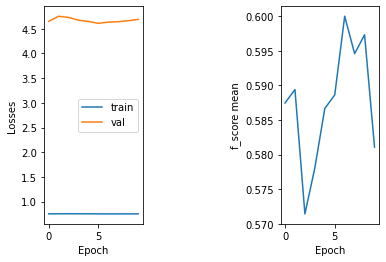

In [30]:
lrbio = 1e-05
lrdeci_tab = np.array([ 1e-05, 1e-06, 1e-07, 1e-08, 1e-09])
seuil_tab = np.arange(0.,0.5,0.02)
print(len(seuil_tab))
max = 0.
lrdeci_max = 0.
seuil_max = 0.

for seuil in seuil_tab:
  for lrdeci in lrdeci_tab:
    history = fit(bert_model, 10, train_loader, lrbio=lrbio, lrdeci=lrdeci, freezebio=False)
    titre = 'seuil : ' + str(seuil) + ' , lrdeci : ' + str(lrdeci)
    print(titre)
    # print_history_test(history)
    f_score = np.mean(history['f_micro'])
    if max < f_score:
      history_temp = history
      max = f_score
      lrdeci_max = lrdeci
      seuil_max = seuil


print("Meilleur f_score : ", max, "avec seuil = ", seuil_max, " et lrdeci = ", lrdeci_max)
print_history_test(history_temp)


=> Avec ce test, meilleure performance avec :</br>
- seuil : 0.36 </br>
- lrdeci : 1e-09

# Comparaison RNNClassifier et Fine tuning BioBert

## Entraînement

Reprise de la fonction 'print_history' du Notebook sur l'étude des données Litcovid

In [31]:
def print_history(hist:dict, losses:bool=True, preci:bool=True, all_good_preci:bool=True, f_micro:bool=True):
    """
    Génération des graphes d'entrainement avec les données extraites lors du fit (losses, etc). Possibilité de ne générer que certains des graphes.

    hist: dict
        résultat de la fonction fit
    """
    nb_epoch = len(hist['train_losses'])
    x = np.arange(0,nb_epoch)
    if losses:
      plt.plot(x,hist['train_losses'], label='train')
      plt.plot(x,hist['val_losses'], label='val')
      plt.xlabel('Epoch')
      plt.ylabel('Losses')
      plt.legend()
      plt.show()
    
    for (cond, name, label) in (zip([preci, all_good_preci, f_micro],
                          ['preci', 'all_good_preci', 'f_micro'],
                          ['Precision pour chaque label séparement', 'Precision pour l\'ensemble des labels', 'F-score micro'])):
        if cond:
            plt.plot(x,hist[name])
            plt.xlabel('Epoch')
            plt.ylabel(label)
            # plt.legend()
            plt.show()


  
# print_history(history)

100%|██████████| 13/13 [00:00<00:00, 95.74it/s]


epoch : 0	 - train loss : 4.381004445693073	 - val loss : 4.443820212651225	 - precision :0.8742973939703628	 - all good precision : 0.02912621359223301	 - f-score micro : 0.04651162790697675



100%|██████████| 13/13 [00:00<00:00, 96.97it/s]


epoch : 1	 - train loss : 4.367654968710506	 - val loss : 4.429106666046438	 - precision :0.8742973939703628	 - all good precision : 0.02912621359223301	 - f-score micro : 0.04651162790697675



100%|██████████| 13/13 [00:00<00:00, 103.35it/s]


epoch : 2	 - train loss : 4.355734376346364	 - val loss : 4.41458389134083	 - precision :0.8742973939703628	 - all good precision : 0.02912621359223301	 - f-score micro : 0.04651162790697675



100%|██████████| 13/13 [00:00<00:00, 100.68it/s]


epoch : 3	 - train loss : 4.340610391953412	 - val loss : 4.400502658584743	 - precision :0.8763413387838528	 - all good precision : 0.02912621359223301	 - f-score micro : 0.062015503875969



100%|██████████| 13/13 [00:00<00:00, 106.28it/s]


epoch : 4	 - train loss : 4.3273892870136335	 - val loss : 4.386344946703865	 - precision :0.8763413387838528	 - all good precision : 0.02912621359223301	 - f-score micro : 0.062015503875969



100%|██████████| 13/13 [00:00<00:00, 100.86it/s]


epoch : 5	 - train loss : 4.303256034851074	 - val loss : 4.372374414240272	 - precision :0.8763413387838528	 - all good precision : 0.02912621359223301	 - f-score micro : 0.062015503875969



100%|██████████| 13/13 [00:00<00:00, 106.35it/s]


epoch : 6	 - train loss : 4.288912062551461	 - val loss : 4.358576543122819	 - precision :0.8773633111905978	 - all good precision : 0.038834951456310676	 - f-score micro : 0.06976744186046512



100%|██████████| 13/13 [00:00<00:00, 104.27it/s]


epoch : 7	 - train loss : 4.26970760495055	 - val loss : 4.345116402339009	 - precision :0.883495145631068	 - all good precision : 0.04854368932038835	 - f-score micro : 0.11627906976744186



100%|██████████| 13/13 [00:00<00:00, 104.89it/s]


epoch : 8	 - train loss : 4.258992139030905	 - val loss : 4.331703000855677	 - precision :0.886561062851303	 - all good precision : 0.07766990291262135	 - f-score micro : 0.13953488372093023



  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 9	 - train loss : 4.233733663371965	 - val loss : 4.317901981687083	 - precision :0.8906489524782831	 - all good precision : 0.08737864077669903	 - f-score micro : 0.17054263565891473


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 0	 - train loss : 0.7495062187606213	 - val loss : 5.05886722305446	 - precision :0.9376596831885539	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5579710144927537


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 1	 - train loss : 0.7499013741811117	 - val loss : 4.9797522165242905	 - precision :0.9356157383750638	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5434782608695653


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 2	 - train loss : 0.7503087543973735	 - val loss : 4.92102761870449	 - precision :0.9345937659683189	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5328467153284672


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 3	 - train loss : 0.7492261914645925	 - val loss : 5.069887587167685	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5328467153284672


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 4	 - train loss : 0.7494427035836613	 - val loss : 5.167694610299416	 - precision :0.9345937659683189	 - all good precision : 0.34951456310679613	 - f-score micro : 0.5362318840579711


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 5	 - train loss : 0.7507825225007301	 - val loss : 5.158413044457297	 - precision :0.9330608073582013	 - all good precision : 0.33980582524271846	 - f-score micro : 0.5270758122743683


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 6	 - train loss : 0.7497825458938	 - val loss : 5.185573503809068	 - precision :0.9345937659683189	 - all good precision : 0.3592233009708738	 - f-score micro : 0.5362318840579711


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 7	 - train loss : 0.7488669601141238	 - val loss : 5.220846342808992	 - precision :0.9361267245784364	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5454545454545454


  0%|          | 0/13 [00:00<?, ?it/s]


epoch : 8	 - train loss : 0.7487835813971127	 - val loss : 5.095283323121302	 - precision :0.9376596831885539	 - all good precision : 0.3883495145631068	 - f-score micro : 0.5514705882352942


100%|██████████| 13/13 [00:04<00:00,  3.16it/s]



epoch : 9	 - train loss : 0.7502554117464552	 - val loss : 5.087059206175573	 - precision :0.9356157383750638	 - all good precision : 0.36893203883495146	 - f-score micro : 0.5434782608695653


___________________________




Comparaison générale


* * * RNNClassifier * * * 
 f-score :  0.17054263565891473


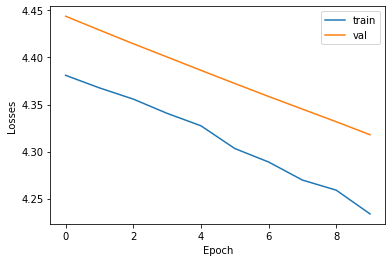

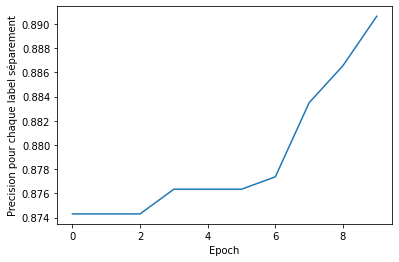

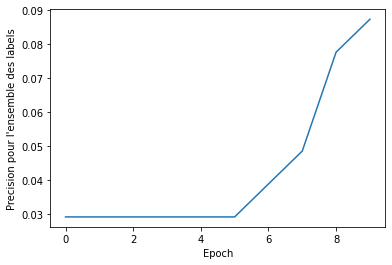

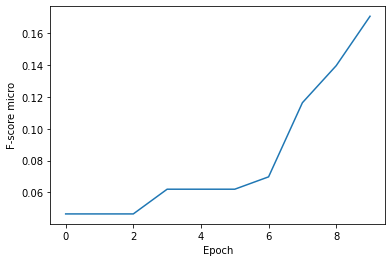



* * * Fine tuning Bert * * *
 f-score :  0.5434782608695653


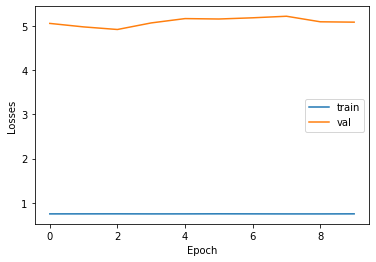

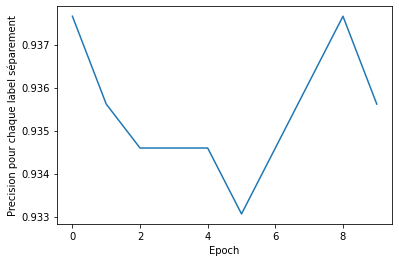

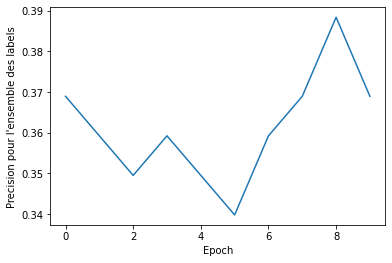

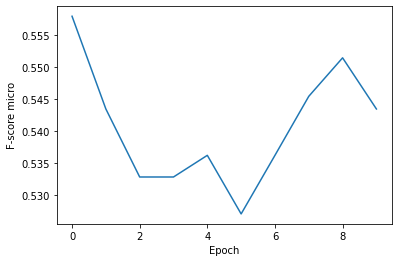

In [38]:
##RNN Classifier :
seuil = 0.11
lr = 1e-5
history_rnnclassif = fit_rnn(rnn_model, train_loader, 10, lr=lr, seuil=seuil)

##Fine tuning BioBERT :
seuil = 0.36
lr_bio = 1e-05
lr_deci = 1e-09

history_bert = fit(bert_model, 10, train_loader, lrbio=lr_bio, lrdeci=lr_deci, freezebio=False, seuil=seuil)


print("\n\n___________________________\n\n")
print("\n\nComparaison générale\n\n")
print('* * * RNNClassifier * * * ')
print(" f-score : ", history_rnnclassif['f_micro'][9])
print_history(history_rnnclassif)
print('\n\n* * * Fine tuning Bert * * *')
print(" f-score : ", history_bert['f_micro'][9])
print_history(history_bert)


## Test

In [39]:
test_loss, test_preci, accu_score, f_score = perf(rnn_model, test_loader, seuil=0.11)
print('RNN Classifier -','test loss :', test_loss, '- precision :', test_preci, '- all good precision :', accu_score, '- f-score micro :', f_score)
test_loss, test_preci, accu_score, f_score = perf(bert_model, test_loader, seuil=0.24)
print('BioBERT -','test loss :', test_loss, '- precision :', test_preci, '- all good precision :', accu_score, '- f-score micro :', f_score)

RNN Classifier - test loss : 4.452333238389757 - precision : 0.8910433979686058 - all good precision : 0.06432748538011696 - f-score micro : 0.1954545454545454
BioBERT - test loss : 5.194952624583105 - precision : 0.9310557094490612 - all good precision : 0.3567251461988304 - f-score micro : 0.5537848605577689


# Conclusion

Le model Bert est plus performant que le model Rnn Classifier. On peut supposer que le manque de données explique les résultats si faibles.